

<div style="color:#254E58;margin:0;font-size:48px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:600;"> Employee Attrition and Factorsy</div>

<br>  
<div style="background-color:#254E58;margin:0;font-size:45px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:600;"> 
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/lab3.jpeg" style='width: 700px; height: 450px;'>
</p>
</div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Libraries used</b></div>

In [6]:
#install some necessary libraries
"""
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install altair
!pip install missingno
!pip install imbalanced-learn
!pip install sklearn
"""

'\n!pip install matplotlib\n!pip install seaborn\n!pip install plotly\n!pip install wordcloud\n!pip install altair\n!pip install missingno\n!pip install imbalanced-learn\n!pip install sklearn\n'

In [7]:
import pandas as pd
import numpy as np

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import altair as alt

#Library for building machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of contents</b></div>

<div class="list-group" id="list-tab" role="tablist">
    
   * [A. Introduction](#1)
        - [I. Introduction to the topic and data set information](#1.1)
            - [1. Context](#1.1.1)
            - [2. Source dataset](#1.1.2)
        - [II. Dataset structure](#1.2)
   * [B. Data Discovery](#2)
        - [1. Read data and calculate number of rows and columns](#2.2.1)
        - [2. What does each line mean? Does it matter the lines have different meanings?](#2.2.2)
        - [3. Does the data have duplicate lines? ](#2.2.3)
        - [4. Percentage of missing values and descriptive statistics of each column ](#2.2.4)
        - [5. Data type of each column](#2.2.5)
        - [6. Consider the value set of categorical attributes](#2.2.6)
        - [7. Consider the value distribution of numeric data columns](#2.2.7)
        - [8. Consider the value distribution of non-numeric data columns](#2.2.8)

   * [C. Discovering Relationships in Data](#3)
        - [Chart 1](#3.1)
        - [Chart 2](#3.2)
        - [Chart 3](#3.3)
        - [Chart 4](#3.4)
        - [Chart 5](#3.5)
        - [Chart 6](#3.6)
        - [Chart 7](#3.7)
        - [Chart 8](#3.8)
        - [Chart 9](#3.9)
        - [Chart 10](#3.10)
        - [Chart 11](#3.11)
        - [Chart 12](#3.12)
        - [Chart 13](#3.13)
        - [Chart 14](#3.14)
        - [Chart 15](#3.15)
   * [D. Machine Learning Models](#4)
        - [I. The problem posed](#4.1)
        - [II. Data preprocessing ](#4.2)
            - [1. Encoding catalog attributes in numerical form](#4.2.1)
            - [2. Eliminate the attributes that do not make sense for the problem](#4.2.2)
            - [3. Handling missing values](#4.2.3)
        - [III. Building a machine learning model ](#4.3)
            - [1. Logistic Regression for Binary Classification](#4.3.1)
            - [2. Using Pipeline and Metrics used to evaluate the model](#4.3.2)
            - [3. Implement](#4.3.3)

        - [V. Summary](#4.4)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Introduction</b></div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"> <b>Introduction to the topic and data set information</b></h2>

<a id="1.1.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Context </b></h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
In a work environment, Employee Attrition describes an unanticipated attrition of the workforce. The causes of this decline are all unavoidable reasons such as retirement, resignation, employee loss of work capacity or sudden death. Companies with high workforce attrition rates often face the risk of abusing internal resources.

Realizing, there are many different reasons for the high labor force attrition rate in enterprises. Eg:

- Working conditions are not guaranteed.
- Salary is too low.
- The job does not match your interests.
- There is no future for career development.
- Unable to balance work and life.
- Lack of proper recognition and appreciation for employees from managers.

Workforce attrition rate is an important indicator in human resource management, which can indicate outstanding issues that need to be addressed. A low engagement rate shows that the company is on the right track. On the contrary, a high attrition rate is something no company wants.

Therefore, this project selects this topic and dataset for the purpose of:

- Discover the factors that affect employee attrition and then take measures to reduce this rate.
- Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?

<a id="1.1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Source dataset </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    

**Method of collection:**

This is a fictitious dataset created by IBM data scientists. This dataset is intended for research purposes and uncovering factors that lead to employee attrition or building machine learning models to predict employee attrition.

**License:**

- C0 1.0 Universal (CC0 1.0) - Public Domain Dedication
   
- No Copyright - You may copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"> <b>II.  Dataset structure</b></h2>

This dataset provides a comprehensive and diverse analysis of an organization's employees, focusing on areas such as employee attrition, personal and work-related factors, and resources. main. Includes more than 35 attributes and their meanings are as follows:

|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |





<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. Data Discovery</b></div>

<a id="2.1.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Read data and calculate number of rows and columns </b></h2>

In [8]:
df = pd.read_csv("HR_Analytics.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [9]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


<a id="2.1.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. What does each line mean? Does it matter the lines have different meanings? </b></h2>

**💬 Comments:**
* The dataset provides a comprehensive and diverse analysis of employees in an organization.
* Each line is an employee's information focusing on aspects such as spending, personal, work and financial factors.
<br>

**=> Thus, no other meaningful lines will appear.**

<a id="2.2.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Does the data have duplicate lines? </b></h2>

👉 We check if any rows are duplicated by using the `duplicated()` and `any()` methods on the `df` dataframe and storing the result in the `have_duplicated_rows` variable. This variable will have the value True if the data contains duplicated lines and False otherwise.

In [10]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

**💬 Comment:** We see that there are no duplicate rows in the data.

<a id="2.2.4"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>4. Percentage of missing values and descriptive statistics of each column </b></h2>

👉 To calculate the percentage of missing values, use `isna()` and `mean()` methods and save it in the variable `missing_rate`

👉 For descriptive statistics of each column, the `describe()` method.

In there:
* `count`: the number of values that are not missing in the column.
* `mean` : the average of the values in the column.
* `std` : standard deviation of the values in the column.
* `min` : the smallest value in the column.
* `25%`, `50%`, `75%` : the **`percentages`** correspond to the data divisions of `25%`, `50%` and `75%`.
* `max` : the maximum value in the column.

👉 Statistics of `numerical` columns

In [11]:
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

Age    DailyRate  DistanceFromHome    Education  \
count         1470.000000  1470.000000       1470.000000  1470.000000   
mean            36.923810   802.485714          9.192517     2.912925   
std              9.135373   403.509100          8.106864     1.024165   
min             18.000000   102.000000          1.000000     1.000000   
25%             30.000000   465.000000          2.000000     2.000000   
50%             36.000000   802.000000          7.000000     3.000000   
75%             43.000000  1157.000000         14.000000     4.000000   
max             60.000000  1499.000000         29.000000     5.000000   
missing_rate     0.000000     0.000000          0.000000     0.000000   

              EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
count                1470.0     1470.000000              1470.000000   
mean                    1.0     1024.865306                 2.721769   
std                     0.0      602.024335                 1.093082   
min                     1.0        1.000000                 1.000000   
25%                     1.0      491.250000                 2.000000   
50%                     1.0     1020.500000                 3.000000   
75%                     1.0     1555.750000                 4.000000   
max                     1.0     2068.000000                 4.000000   
missing_rate            0.0        0.000000                 0.000000   

               HourlyRate  JobInvolvement     JobLevel  ...  \
count         1470.000000     1470.000000  1470.000000  ...   
mean            65.891156        2.729932     2.063946  ...   
std             20.329428        0.711561     1.106940  ...   
min             30.000000        1.000000     1.000000  ...   
25%             48.000000        2.000000     1.000000  ...   
50%             66.000000        3.000000     2.000000  ...   
75%             83.750000        3.000000     3.000000  ...   
max            100.000000        4.000000     5.000000  ...   
missing_rate     0.000000        0.000000     0.000000  ...   

              RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                      1470.000000         1470.0       1470.000000   
mean                          2.712245           80.0          0.793878   
std                           1.081209            0.0          0.852077   
min                           1.000000           80.0          0.000000   
25%                           2.000000           80.0          0.000000   
50%                           3.000000           80.0          1.000000   
75%                           4.000000           80.0          1.000000   
max                           4.000000           80.0          3.000000   
missing_rate                  0.000000            0.0          0.000000   

              TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count               1470.000000            1470.000000      1470.000000   
mean                  11.279592               2.799320         2.761224   
std                    7.780782               1.289271         0.706476   
min                    0.000000               0.000000         1.000000   
25%                    6.000000               2.000000         2.000000   
50%                   10.000000               3.000000         3.000000   
75%                   15.000000               3.000000         3.000000   
max                   40.000000               6.000000         4.000000   
missing_rate           0.000000               0.000000         0.000000   

              YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count            1470.000000         1470.000000              1470.000000   
mean                7.008163            4.229252                 2.187755   
std                 6.126525            3.623137                 3.222430   
min                 0.000000            0.000000                 0.000000   
25%                 3.000000            2.000000    

👉 Statistics of `category` columns

In [12]:
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

Attrition BusinessTravel              Department EducationField  \
count             1470           1470                    1470           1470   
unique               2              3                       3              6   
top                 No  Travel_Rarely  Research & Development  Life Sciences   
freq              1233           1043                     961            606   
missing_rate       0.0            0.0                     0.0            0.0   

             Gender          JobRole MaritalStatus Over18 OverTime  
count          1470             1470          1470   1470     1470  
unique            2                9             3      1        2  
top            Male  Sales Executive       Married      Y       No  
freq            882              326           673   1470     1054  
missing_rate    0.0              0.0           0.0    0.0      0.0

👉 `histogram` for `numerical` columns

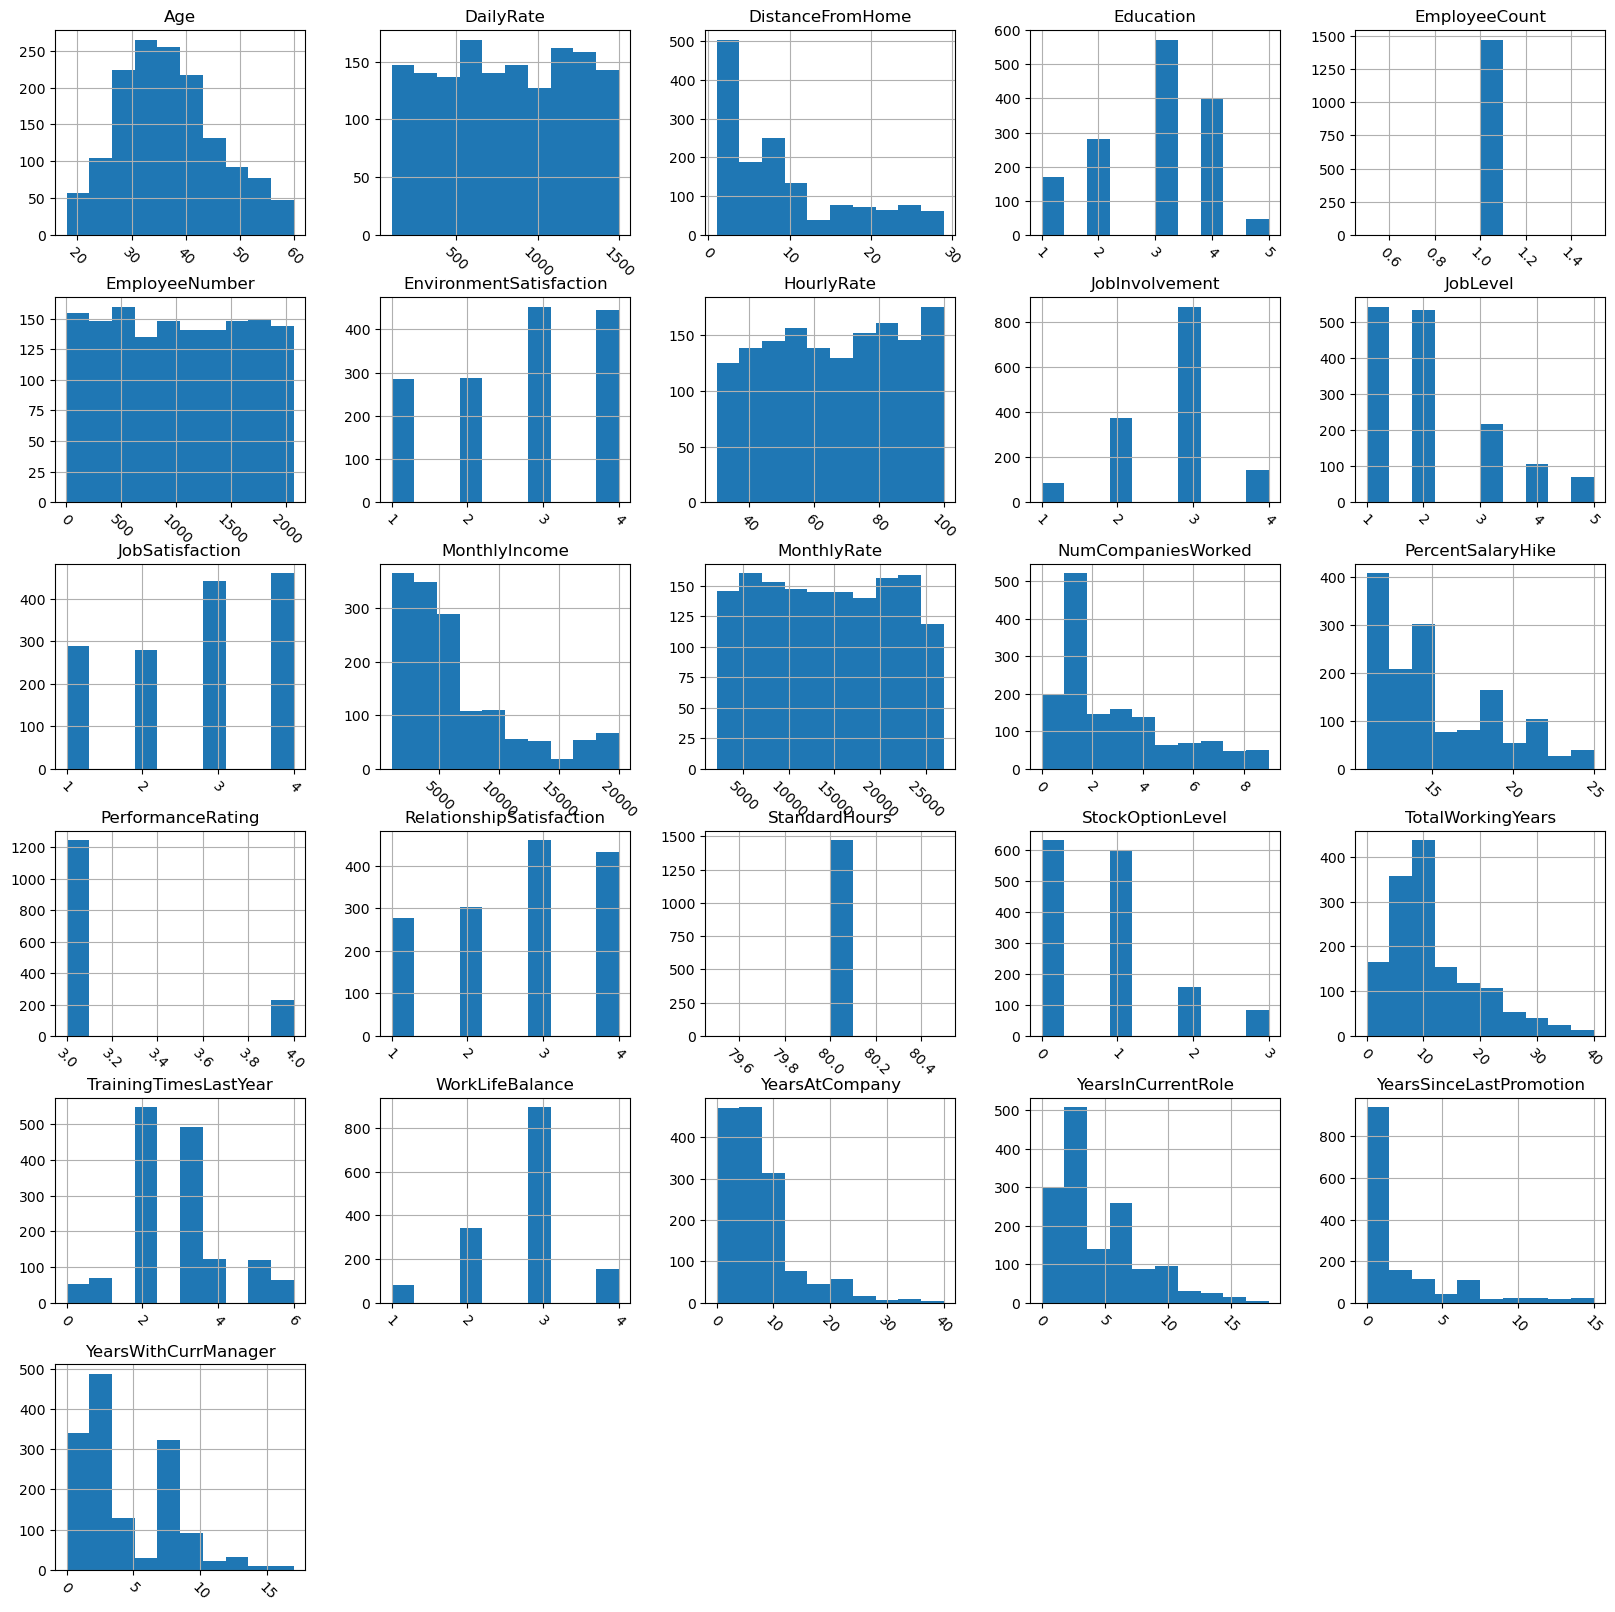

In [13]:
df.hist(figsize=(20,20), xrot=-45)
plt.show()

##### **💬 Comment**: The following columns can be omitted because their values do not affect the analysis results
1. `Over18`: All values are `Y`
2. `EmployeeCount`: all values are `1.0`
3. `StandardHours`: all values are `80.0`
4. `EmployeeNumber`: is the `id` of the employee that has the same meaning as the `index` of each line

<a id="2.2.5"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>5. Data type of each column</b></h2>

In [14]:
col_dtype = df.dtypes
col_dtype

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

👉 We use `select_dtypes` method to list columns of type `numerical` and `category`.

In [15]:
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


<a id="2.2.6"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>6. Consider the value set of categorical attributes</b></h2>

In [16]:
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))

In [17]:
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  JobRole {'Sales Executive', 'Healthcare Representative', 'Manufacturing Director', 'Manager', 'Human Resources', 'Research Scientist', 'Laboratory Technician', 'Sales Representative', 'Research Director'}
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of  Attrition {'No', 'Yes'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  Over18 {'Y'}
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
Unique values of  EducationField {'Marketing', 'Other', 'Medical', 'Life Sciences', 'Technical Degree', 'Human Resources'}
Unique values of  OverTime {'No', 'Yes'}
Unique values of  Gender {'Female', 'Male'}


##### **💬 Comment**:

The value set of the categorical attributes is complete and easy to understand, so we do not need to perform preprocessing steps for these attributes.

<a id="2.2.7"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>7. Consider the value distribution of numeric data columns</b></h2>

👉 Perform statistics on numeric data columns and consider the following specific values:

- Percentage (from 0 to 100) of missing values (missing_ratio).
- Min value (min).
- The value of lower quartile (25th percentile) (lower_quartile).
- Median value (50th percentile) (median).
- Value upper quartile (75th percentile) (upper_quartile).
- Max value (max).

👉 Sum the missing values of each column using the `isnull()` and `sum()` methods, and then divide by the number of rows to get the percentage of missing values `missing_ratio`.

In [18]:
missing_ratio = df[num_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

missing_ratio
DistanceFromHome                    0.0
JobLevel                            0.0
DailyRate                           0.0
HourlyRate                          0.0
EmployeeNumber                      0.0
YearsSinceLastPromotion             0.0
NumCompaniesWorked                  0.0
PercentSalaryHike                   0.0
YearsAtCompany                      0.0
JobSatisfaction                     0.0
PerformanceRating                   0.0
EnvironmentSatisfaction             0.0
MonthlyRate                         0.0
StockOptionLevel                    0.0
RelationshipSatisfaction            0.0
TrainingTimesLastYear               0.0
StandardHours                       0.0
YearsWithCurrManager                0.0
Education                           0.0
Age                                 0.0
YearsInCurrentRole                  0.0
WorkLifeBalance                     0.0
EmployeeCount                       0.0
JobInvolvement                      0.0
TotalWorkingYears                   0.0
MonthlyIncome                       0.0

Visualize the distribution of missing values using the `missingno` . library

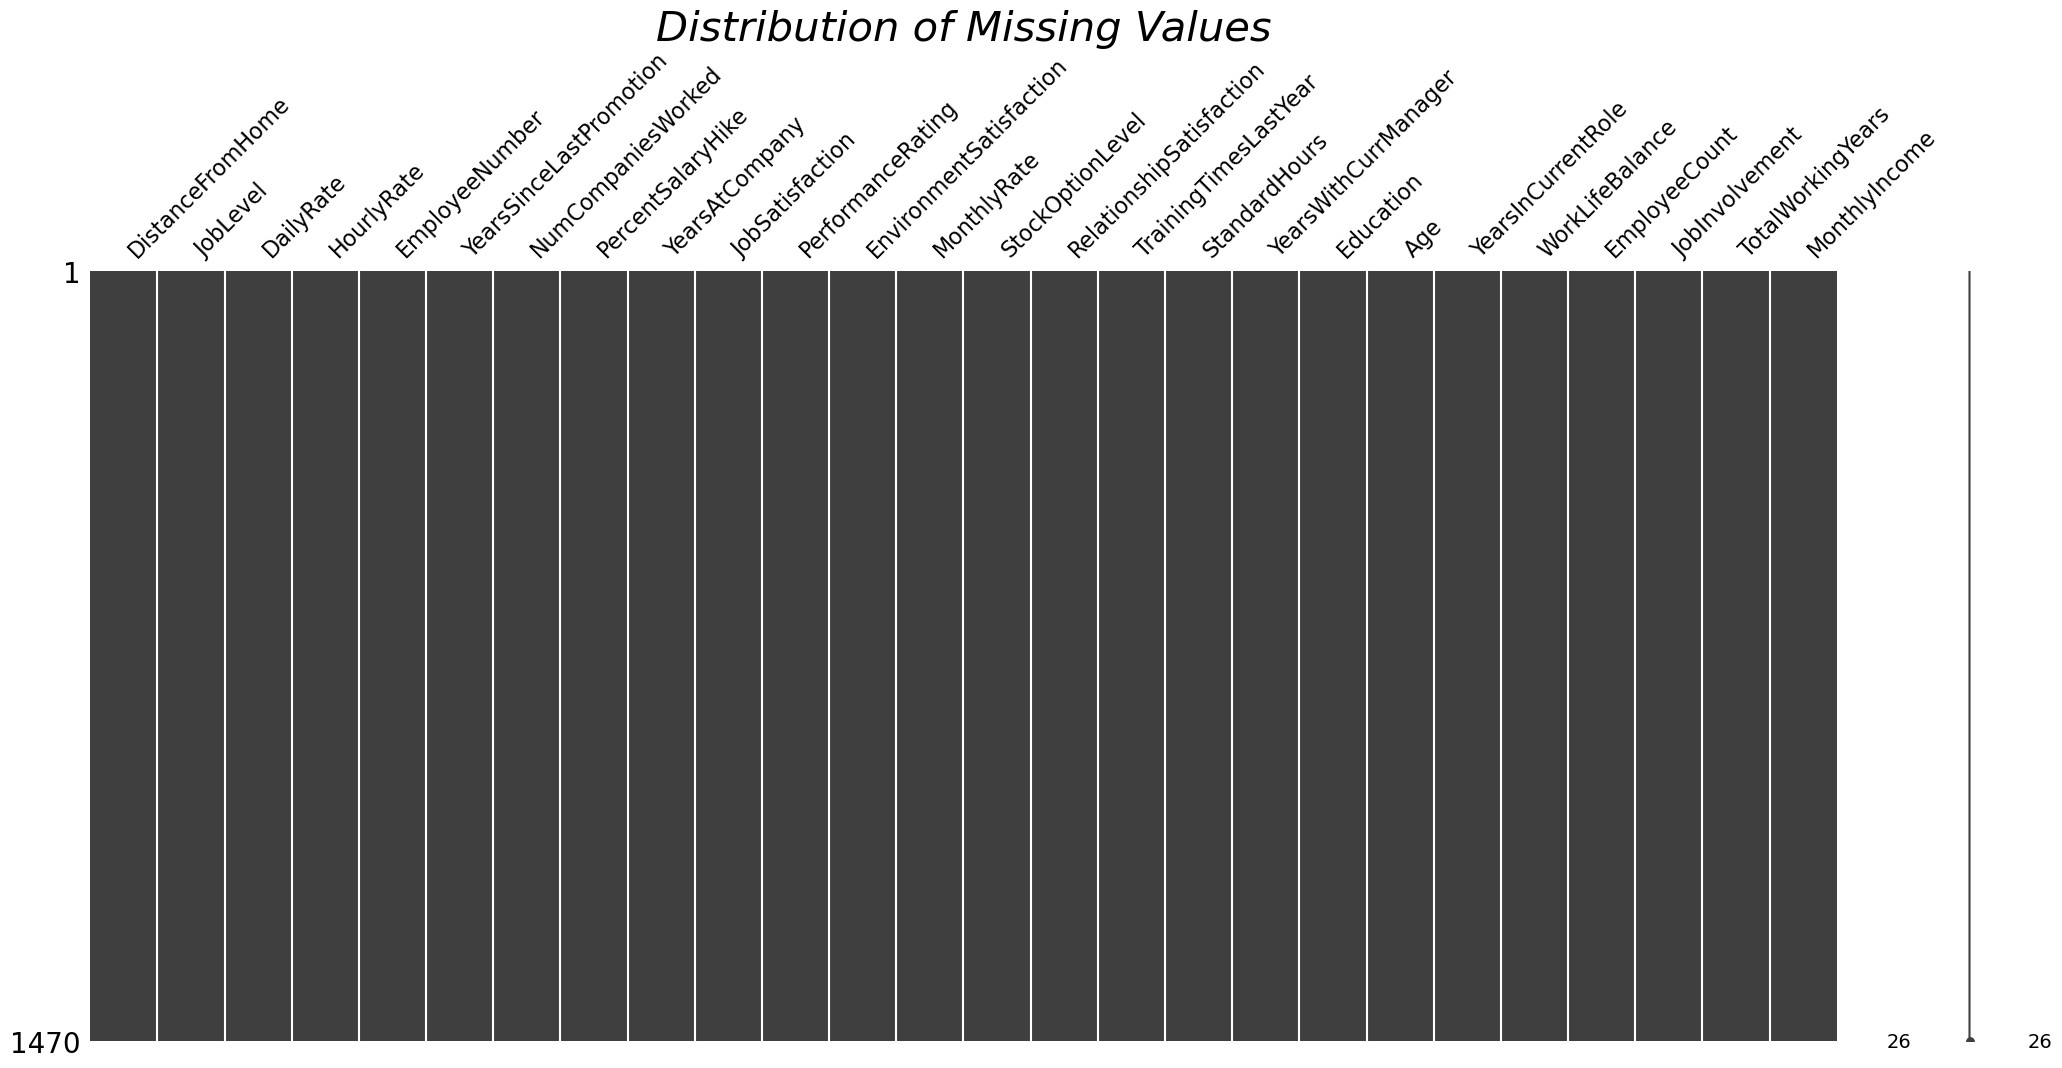

In [19]:
msno.matrix(df[num_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

👉 Calculate descriptive statistics using the `describe()` method.

In [20]:
num_cols_info_df = df[num_cols].describe()
num_cols_info_df

DistanceFromHome     JobLevel    DailyRate   HourlyRate  \
count       1470.000000  1470.000000  1470.000000  1470.000000   
mean           9.192517     2.063946   802.485714    65.891156   
std            8.106864     1.106940   403.509100    20.329428   
min            1.000000     1.000000   102.000000    30.000000   
25%            2.000000     1.000000   465.000000    48.000000   
50%            7.000000     2.000000   802.000000    66.000000   
75%           14.000000     3.000000  1157.000000    83.750000   
max           29.000000     5.000000  1499.000000   100.000000   

       EmployeeNumber  YearsSinceLastPromotion  NumCompaniesWorked  \
count     1470.000000              1470.000000         1470.000000   
mean      1024.865306                 2.187755            2.693197   
std        602.024335                 3.222430            2.498009   
min          1.000000                 0.000000            0.000000   
25%        491.250000                 0.000000            1.000000   
50%       1020.500000                 1.000000            2.000000   
75%       1555.750000                 3.000000            4.000000   
max       2068.000000                15.000000            9.000000   

       PercentSalaryHike  YearsAtCompany  JobSatisfaction  ...  StandardHours  \
count        1470.000000     1470.000000      1470.000000  ...         1470.0   
mean           15.209524        7.008163         2.728571  ...           80.0   
std             3.659938        6.126525         1.102846  ...            0.0   
min            11.000000        0.000000         1.000000  ...           80.0   
25%            12.000000        3.000000         2.000000  ...           80.0   
50%            14.000000        5.000000         3.000000  ...           80.0   
75%            18.000000        9.000000         4.000000  ...           80.0   
max            25.000000       40.000000         4.000000  ...           80.0   

       YearsWithCurrManager    Education          Age  YearsInCurrentRole  \
count           1470.000000  1470.000000  1470.000000         1470.000000   
mean               4.123129     2.912925    36.923810            4.229252   
std                3.568136     1.024165     9.135373            3.623137   
min                0.000000     1.000000    18.000000            0.000000   
25%                2.000000     2.000000    30.000000            2.000000   
50%                3.000000     3.000000    36.000000            3.000000   
75%                7.000000     4.000000    43.000000            7.000000   
max               17.000000     5.000000    60.000000           18.000000   

       WorkLifeBalance  EmployeeCount  JobInvolvement  TotalWorkingYears  \
count      1470.000000         1470.0     1470.000000        1470.000000   
mean          2.761224            1.0        2.729932          11.279592   
std           0.706476            0.0        0.711561           7.780782   
min           1.000000            1.0        1.000000           0.000000   
25%           2.000000            1.0        2.000000           6.000000   
50%           3.000000            1.0        3.000000          10.000000   
75%           3.000000            1.0        3.000000          15.000000   
max           4.000000            1.0        4.000000          40.000000   

       MonthlyIncome  
count    1470.000000  
mean     6502.931293  
std      4707.956783  
min      1009.000000  
25%      2911.000000  
50%      4919.000000  
75%      8379.000000  
max     19999.000000  

[8 rows x 26 columns]

Combine `missing_ratio_df` and `num_cols_info_df` to fully observe the required statistical values.

In [21]:
num_cols_info_df = pd.concat([missing_ratio_df.transpose(), num_cols_info_df], axis=0)
pd.set_option("display.max_columns", None)
display(num_cols_info_df)
pd.reset_option('display.max_columns')

DistanceFromHome     JobLevel    DailyRate   HourlyRate  \
missing_ratio          0.000000     0.000000     0.000000     0.000000   
count               1470.000000  1470.000000  1470.000000  1470.000000   
mean                   9.192517     2.063946   802.485714    65.891156   
std                    8.106864     1.106940   403.509100    20.329428   
min                    1.000000     1.000000   102.000000    30.000000   
25%                    2.000000     1.000000   465.000000    48.000000   
50%                    7.000000     2.000000   802.000000    66.000000   
75%                   14.000000     3.000000  1157.000000    83.750000   
max                   29.000000     5.000000  1499.000000   100.000000   

               EmployeeNumber  YearsSinceLastPromotion  NumCompaniesWorked  \
missing_ratio        0.000000                 0.000000            0.000000   
count             1470.000000              1470.000000         1470.000000   
mean              1024.865306                 2.187755            2.693197   
std                602.024335                 3.222430            2.498009   
min                  1.000000                 0.000000            0.000000   
25%                491.250000                 0.000000            1.000000   
50%               1020.500000                 1.000000            2.000000   
75%               1555.750000                 3.000000            4.000000   
max               2068.000000                15.000000            9.000000   

               PercentSalaryHike  YearsAtCompany  JobSatisfaction  \
missing_ratio           0.000000        0.000000         0.000000   
count                1470.000000     1470.000000      1470.000000   
mean                   15.209524        7.008163         2.728571   
std                     3.659938        6.126525         1.102846   
min                    11.000000        0.000000         1.000000   
25%                    12.000000        3.000000         2.000000   
50%                    14.000000        5.000000         3.000000   
75%                    18.000000        9.000000         4.000000   
max                    25.000000       40.000000         4.000000   

               PerformanceRating  EnvironmentSatisfaction   MonthlyRate  \
missing_ratio           0.000000                 0.000000      0.000000   
count                1470.000000              1470.000000   1470.000000   
mean                    3.153741                 2.721769  14313.103401   
std                     0.360824                 1.093082   7117.786044   
min                     3.000000                 1.000000   2094.000000   
25%                     3.000000                 2.000000   8047.000000   
50%                     3.000000                 3.000000  14235.500000   
75%                     3.000000                 4.000000  20461.500000   
max                     4.000000                 4.000000  26999.000000   

               StockOptionLevel  RelationshipSatisfaction  \
missing_ratio          0.000000                  0.000000   
count               1470.000000               1470.000000   
mean                   0.793878                  2.712245   
std                    0.852077                  1.081209   
min                    0.000000                  1.000000   
25%                    0.000000                  2.000000   
50%                    1.000000                  3.000000   
75%                    1.000000                  4.000000   
max                    3.000000                  4.000000   

               TrainingTimesLastYear  StandardHours  YearsWithCurrManager  \
missing_ratio               0.000000            0.0              0.000000   
count                    1470.000000         1470.0           1470.000000   
mean                        2.799320           80.0              4.123129   
std                         1.289271            0.0              3.568136   
min                         0.000000           80.0    

##### **💬 Comment**:

- Numeric data columns have absolutely no missing values.
- The min, lower quartile, median, upper quartile and max values do not show anomalies so we do not need to perform preprocessing steps for these numeric attributes.

<a id="2.2.8"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>8. Consider the value distribution of non-numeric data columns</b></h2>

In [22]:
missing_ratio = df[cat_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

missing_ratio
JobRole                   0.0
MaritalStatus             0.0
Attrition                 0.0
Department                0.0
Over18                    0.0
BusinessTravel            0.0
EducationField            0.0
OverTime                  0.0
Gender                    0.0

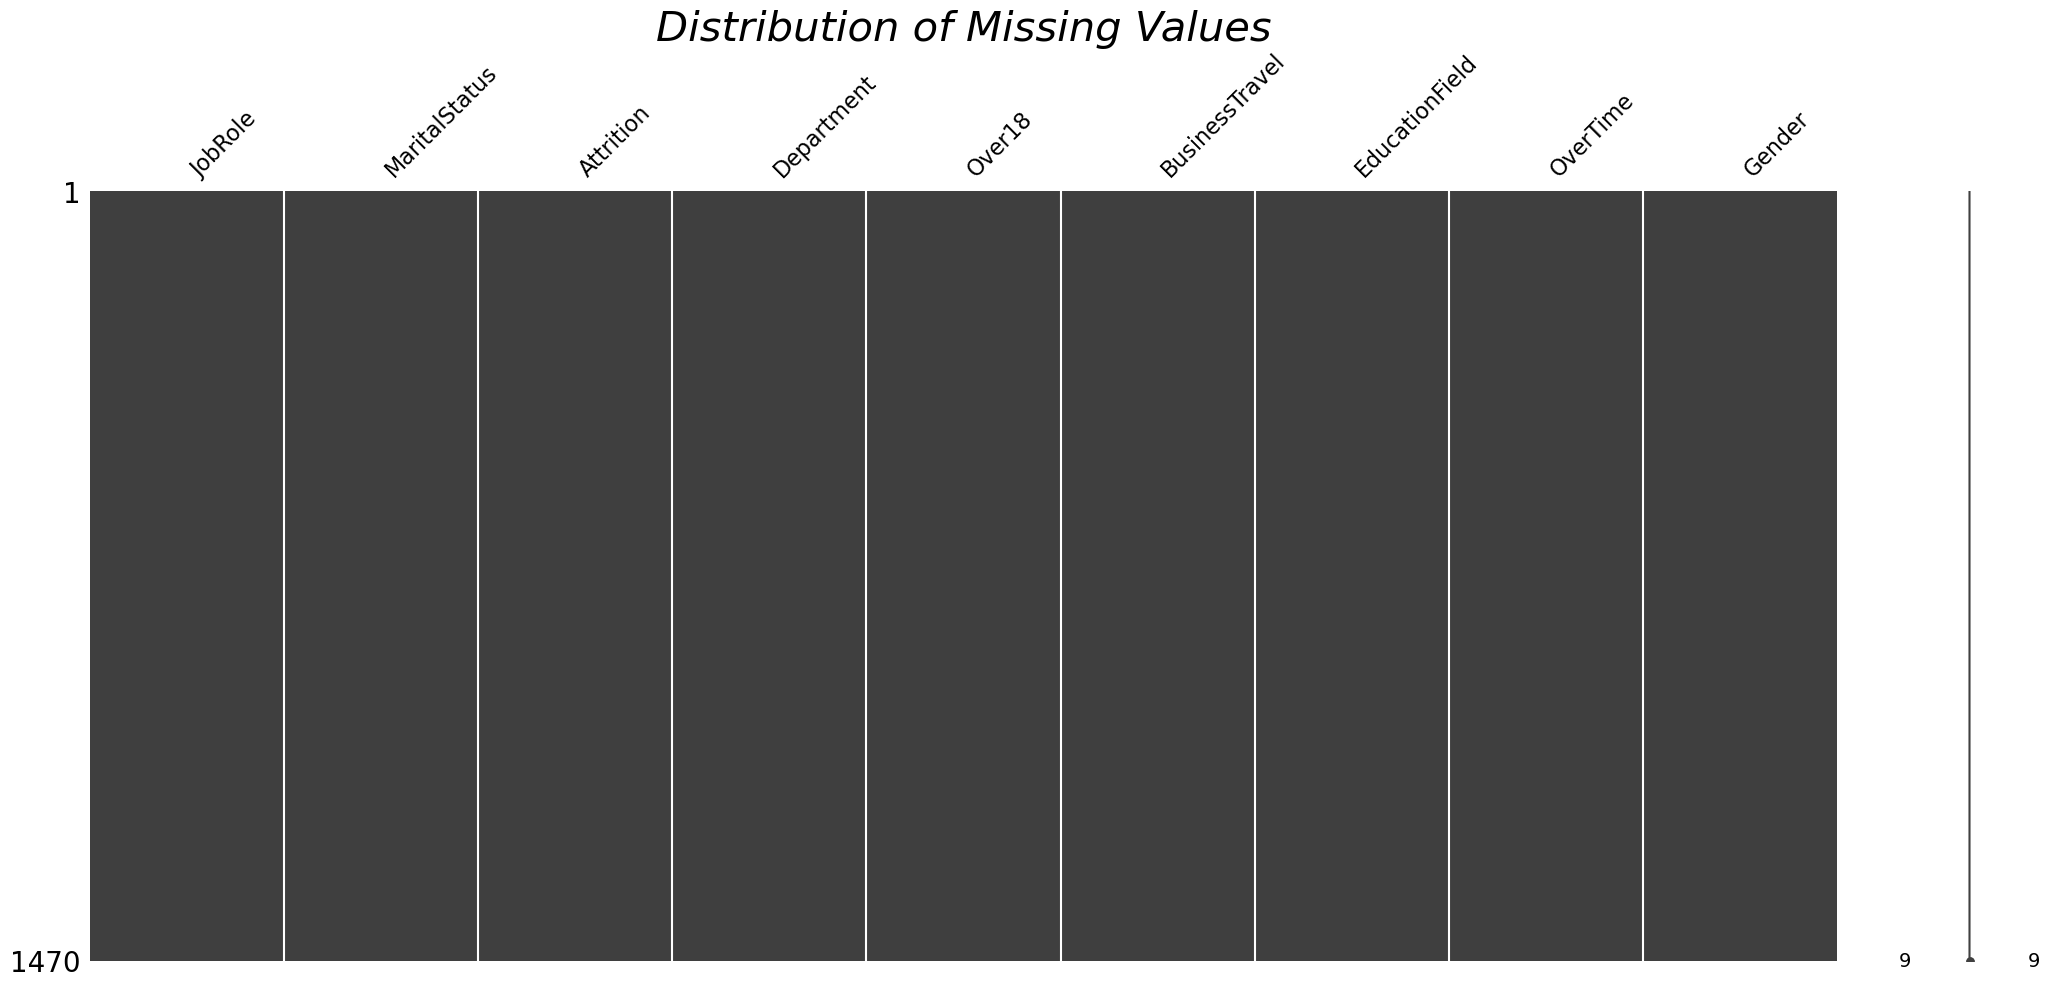

In [23]:
msno.matrix(df[cat_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

👉 Calculate the number of different values using the nunique() method.

In [24]:
n_values_df = pd.DataFrame({'n_values': df[cat_cols].nunique()})
n_values_df

n_values
JobRole                9
MaritalStatus          3
Attrition              2
Department             3
Over18                 1
BusinessTravel         3
EducationField         6
OverTime               2
Gender                 2

👉 Calculate the ratio of each value using the `value_counts()` method.

In [25]:
value_ratios_dict = {}
for col in cat_cols:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({'value_ratios': value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[cat_cols]
value_ratios_df


JobRole  \
value_ratios  {'Sales Executive': 22.176870748299322, 'Resea...   

                                                  MaritalStatus  \
value_ratios  {'Married': 45.78231292517007, 'Single': 31.97...   

                                                      Attrition  \
value_ratios  {'No': 83.87755102040816, 'Yes': 16.1224489795...   

                                                     Department        Over18  \
value_ratios  {'Research & Development': 65.37414965986395, ...  {'Y': 100.0}   

                                                 BusinessTravel  \
value_ratios  {'Travel_Rarely': 70.95238095238095, 'Travel_F...   

                                                 EducationField  \
value_ratios  {'Life Sciences': 41.224489795918366, 'Medical...   

                                                       OverTime  \
value_ratios  {'No': 71.70068027210884, 'Yes': 28.2993197278...   

                                      Gender  
value_ratios  {'Male': 60.0, 'Female': 40.0}

In [26]:
cat_cols_info_df = pd.concat([missing_ratio_df.transpose(), n_values_df.transpose(), value_ratios_df], axis=0)
pd.set_option('display.max_colwidth', None)
display(cat_cols_info_df)
pd.reset_option('display.max_colwidth')

JobRole  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                              0.0   
n_values                                                                                                                                                                                                                                                                                                                                                                                     9   
value_ratios   {'Sales Executive': 22.176870748299322, 'Research Scientist': 19.86394557823129, 'Laboratory Technician': 17.61904761904762, 'Manufacturing Director': 9.863945578231291, 'Healthcare Representative': 8.91156462585034, 'Manager': 6.938775510204081, 'Sales Representative': 5.646258503401361, 'Research Director': 5.442176870748299, 'Human Resources': 3.537414965986395}   

                                                                                             MaritalStatus  \
missing_ratio                                                                                          0.0   
n_values                                                                                                 3   
value_ratios   {'Married': 45.78231292517007, 'Single': 31.97278911564626, 'Divorced': 22.244897959183675}   

                                                          Attrition  \
missing_ratio                                                   0.0   
n_values                                                          2   
value_ratios   {'No': 83.87755102040816, 'Yes': 16.122448979591837}   

                                                                                                                    Department  \
missing_ratio                                                                                                              0.0   
n_values                                                                                                                     3   
value_ratios   {'Research & Development': 65.37414965986395, 'Sales': 30.34013605442177, 'Human Resources': 4.285714285714286}   

                     Over18  \
missing_ratio           0.0   
n_values                  1   
value_ratios   {'Y': 100.0}   

                                                                                                                BusinessTravel  \
missing_ratio                                                                                                              0.0   
n_values                                                                                                                     3   
value_ratios   {'Travel_Rarely': 70.95238095238095, 'Travel_Frequently': 18.843537414965986, 'Non-Travel': 10.204081632653061}   

                                                                                                                                                                                                                EducationField  \
missing_ratio                                                                                                                                                                                                              0.0   
n_values                                                                                                                                                                                                                     6   
value_ratios   {'Life Sciences': 41.224489795918366, 'Medical': 31.564625850340132, 'Marketing': 10.816326530612246, 'Technical Degree': 8.979591836734693, 'Other': 5.578231292517007, 'Human Resources': 1.8367346938775513}   

                                

##### **💬 Comment**:

- Non-numeric data columns have absolutely no missing values.
- The attribute 'Over18' has only 1 value, 'Y', indicating that all employees in the dataset are over 18 years old.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Discovering Relationships in Data</b></div>

<a id="3.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 1 📉</h2>

**Title:** Consider the rate of employees leaving the organization or not.

**Chart type:** Donut chart.

**Visualization:**

In [27]:
plot_df = df.copy()
plot_df= plot_df['Attrition'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index,hole=0.3),row=1,col=1)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#335C42","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/Voluntary-Resignation--1-.png",
        xref="paper",
        yref="paper",
        x=1.2, y=0.25,
        sizex=0.7, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.update_layout(title ={'text' : "<b>Attrition rate of the organization's forces</b>", 
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bgcolor="#E4F5CA",
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- The employee turnover rate of this organization is 16.1%. And according to experts in the field of human resources, the human resource consumption rate of each enterprise from 4% to 6% is a stable level.

=> The turnover rate of this organization is at a dangerous level. Therefore, the organization should take measures to reduce this ratio.

<a id="3.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 2 📉</h2>

**Title:** Ratio of men and women in the organization.

**Chart type:** Pie chart (pie chart).

**Visualization:**

In [28]:
plot_df = df.copy()
plot_df= plot_df['Gender'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index),row=1,col=2)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#AC1F29","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/viz.jpg",
        xref="paper",
        yref="paper",
        x=0.5, y=0.20,
        sizex=0.6, sizey=1,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.update_layout(title ={'text' : "<b>Gender rate of the organization's forces</b>", 
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bgcolor="#EFFAD3",
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
The number of male employees in the company accounts for a higher proportion than female employees (more than 20%).

<a id="3.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b>3 📉</h2>

**Title:** Ratio of ranks in work

**Chart Type:** TreeMap

**Visualization:**

In [29]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df = plot_df['JobLevel'].value_counts()

fig = px.treemap(plot_df, 
                 path=[plot_df.index],
                 values=plot_df.values, 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

fig.data[0].customdata = [36.94, 4.69, 7.21, 36.33, 14.83]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
From the TreeMap, we see:
- 'Entry level' (job position of people with little work experience) accounted for the largest number with 543 people (accounting for 36.94%), corresponding to the rectangle with the largest area. Next is 'Mid level' with 534 people (36.33%).
- Occupy the least percentage of 'Executive' (senior positions with very important roles in each department) with only 69 people (accounting for 4.69%).

=> The higher the rank in the job, the smaller the number of employees.

<a id="3.4"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 4 📉</h2>

**Title:** Percentage of levels in work

**Chart Type:** BarPlot

**Visualization:**

In [30]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df= plot_df['JobLevel'].value_counts()

colors = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450"]
data = go.Bar(x=plot_df.index, y = plot_df.values, text = plot_df.values , textposition ='inside',
              textfont = dict(size = 12,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Distribution of Attrition by Job Level</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='<b>Job Level</b>'),
                   yaxis =dict(title='<b>The number of employees</b>'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

#### <span style='color:#2B9C15 '>💬 Chart </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

Based on the bar chart above we can see:
- Employees at Level 1 (Entry level) have a very high rate of leaving the company (60%). They are usually very young people.
- Employees at Level 2 (Middle Level) have a relatively high turnover rate (21%)
- Employees who achieve Level 4 (Lead) and 5 (Executive) have a very low turnover rate.
  
=> Young employees who have just joined the company have a very high ability to "jump".

<a id="3.5"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 5 📉</h2>

**Title:** Distribution of working overtime in job roles.

**Chart type:** Stacked bar chart.

**Visualization:**

In [31]:
fig = px.histogram(data_frame = df, x = 'JobRole', color = 'OverTime',
                 width=1000, height=500, template="simple_white")

fig.update_layout(
    title={
        'text': "Job Role by Job Role",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- The 3 positions with the most personnel are: Sale Executive, Research Scientist and Laboratory Technician.
- The rate of working OverTime is nearly 2 times that of the group that does not work overtime. The trend of working OT is increasingly popular.

<a id="3.6"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 6 📉</h2>

**Title:** Relationship between leaving rate and job satisfaction.

**Chart type:** Bar chart + line plot.

**Visualization:**

In [32]:
new_df=df.groupby('EnvironmentSatisfaction').count()
idx=list(new_df.index) #get groups as group 1, group 2, group 3, group 4 
count=list(new_df['Age'].values)

percent_dropout=[] #list contains employees dropout percent
for i in range(len(idx)):
    percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\9766881.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [33]:
envSat_attrition_df={idx[i]:[count[i],percent_dropout[i]] for i in range(len(idx))}
envSat_attrition_df['Statistical']=['Number of employees','Percentage of leave']
envSat_attrition_df=pd.DataFrame(envSat_attrition_df).set_index('Statistical')
envSat_attrition_df.head()

1        2        3        4
Statistical                                            
Number of employees  284.000  287.000  453.000  446.000
Percentage of leave   25.352   14.983   13.687   13.453

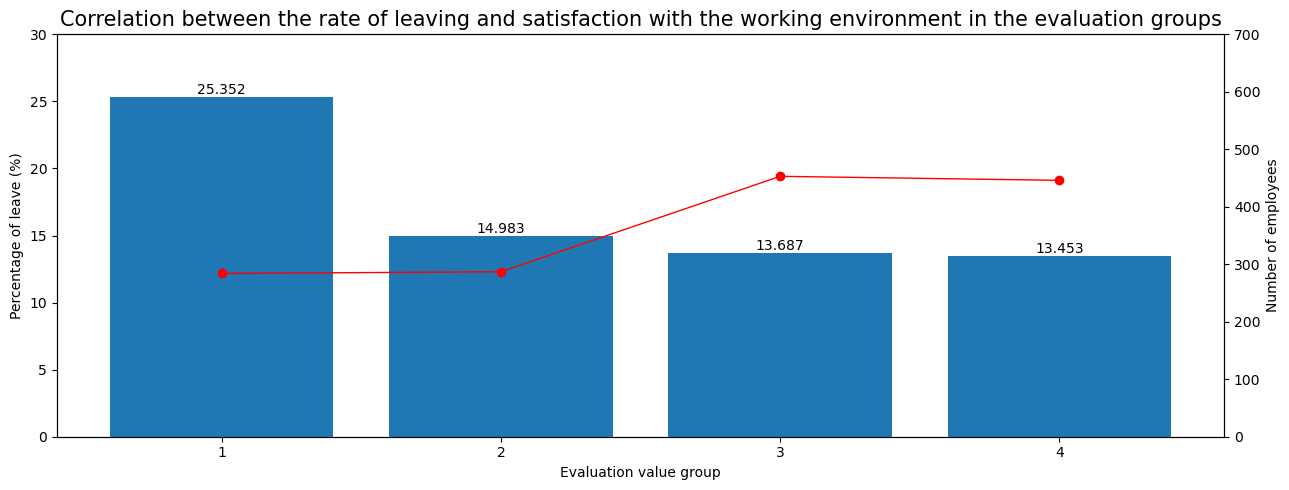

In [34]:
groups=['1','2','3','4']
fig,ax1=plt.subplots(figsize=(13,5))# bar chart
bars=ax1.bar(groups,envSat_attrition_df.loc[['Percentage of leave']].values[0])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax2=ax1.twinx()
ax2.plot(groups,envSat_attrition_df.loc[['Number of employees']].values[0],lw=1,marker='o',color='r')
ax1.set(xlabel='Evaluation value group', ylabel='Percentage of leave (%)')
ax2.set(ylabel='Number of employees')
ax1.set_ylim(0,30)
ax2.set_ylim(0,700)
ax1.set_title(f'Correlation between the rate of leaving and satisfaction with the working environment in the evaluation groups', size=15)
fig.tight_layout()
plt.show();

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- The number of employees who are satisfied with the working environment is also very high, as is the job satisfaction.
- The average rate of leaving is higher in the low-rated groups than in the high-value groups. This is also very consistent with reality.
- From here, it shows that besides salary, the working environment factor is also an important factor that determines whether employees really stick around for a long time or not.

<a id="3.7"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 7 📉</h2>

**Title:** How does the average salary change according to the number of years working at the company?

**Chart type:** Line chart

**Visualization:**

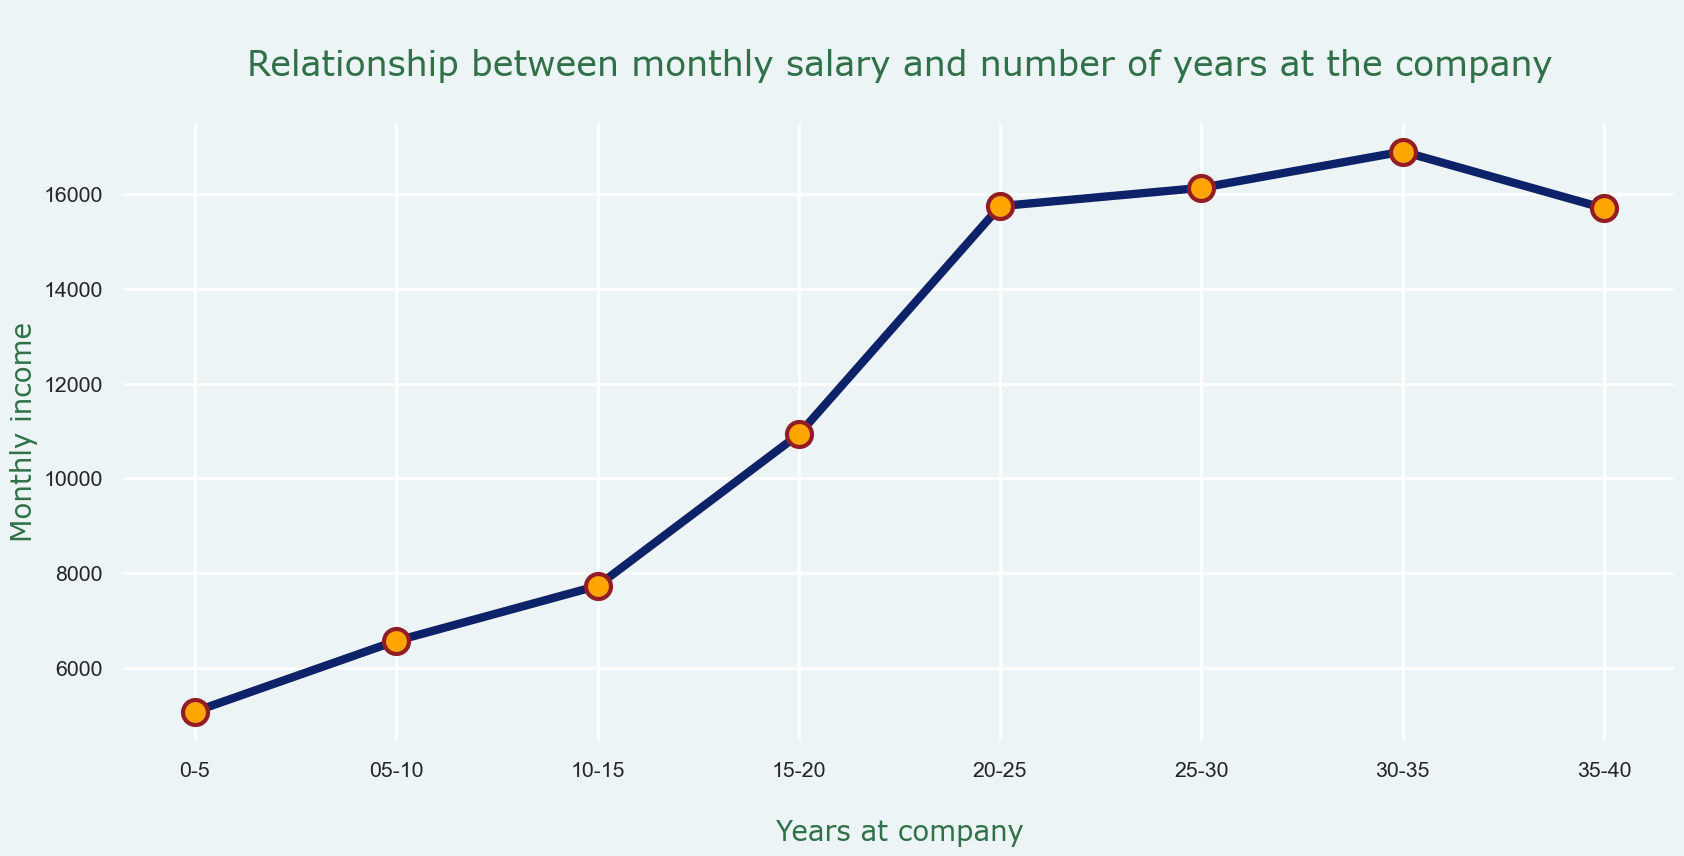

In [35]:
temp=df.copy()
conditions=[(temp['YearsAtCompany']>=0) & (temp['YearsAtCompany']<=5),
            (temp['YearsAtCompany']>5) & (temp['YearsAtCompany']<=10),
            (temp['YearsAtCompany']>10) & (temp['YearsAtCompany']<=15),
            (temp['YearsAtCompany']>15) & (temp['YearsAtCompany']<=20),
            (temp['YearsAtCompany']>20) & (temp['YearsAtCompany']<=25),
            (temp['YearsAtCompany']>25) & (temp['YearsAtCompany']<=30),
            (temp['YearsAtCompany']>30) & (temp['YearsAtCompany']<=35),
            (temp['YearsAtCompany']>35) & (temp['YearsAtCompany']<=40)]
values=['0-5','05-10','10-15','15-20','20-25','25-30','30-35','35-40']
temp['YearsRange']=np.select(conditions, values)

plot_df=temp.groupby(['YearsRange'])['MonthlyIncome'].mean().reset_index()

sns.set(rc={"axes.facecolor":"#ECF4F5","figure.facecolor":"#ECF4F5"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,8))
p=sns.lineplot(x=plot_df["YearsRange"] ,y=plot_df["MonthlyIncome"],data=plot_df,color="#0E2269",marker="o",linewidth=6,markersize=18,markerfacecolor="orange",markeredgecolor="#921D26",markeredgewidth=3)
p.axes.set_title("\nRelationship between monthly salary and number of years at the company\n",fontsize=25, color="#307149", family ='Verdana')
p.axes.set_xlabel("\nYears at company",fontsize=20, color="#307149", family ='Verdana')
p.axes.set_ylabel("Monthly income",fontsize=20, color="#307149", family ='Verdana')
sns.despine(left=True, bottom=True)
plt.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- During the period of working with the company from 0-35 years, the average salary of employees increases gradually over time. This proves that when working for a long time, that employee will have more work experience and be a loyal employee to the company. Should have a decent salary is worth it.

- However, the salary for working period from 35-40 years has decreased but not too big. The reason for this decline may be that when they have been with the company for 35-40 years, these employees are nearing retirement age, so their productivity decreases or they have ceded senior positions. for young leaders,...

<a id="3.8"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 8 📉</h2>

**Title:** Degree of business travel in each department

**Chart type:** Radar chart

**Visualization:**

In [36]:
plot_df = df.groupby(['Department','BusinessTravel']).size()
Human_Resources=np.round(plot_df['Human Resources'].values/(plot_df['Human Resources'].values.sum()),2)
Research_Development=np.round(plot_df['Research & Development'].values/(plot_df['Research & Development'].values.sum()),2)
Sales=np.round(plot_df['Sales'].values/(plot_df['Sales'].values.sum()),2)

categories = ['Non-Travel', 'Travel_Frequently','Travel_Rarely']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
             r = Human_Resources, 
             theta = categories,
             fill = 'toself',
             name = 'Human_Resources'
             ))
fig.add_trace(go.Scatterpolar(
             r = Research_Development, 
             theta = categories,
             fill = 'toself',
             name = 'Research_Development'
             ))
fig.add_trace(go.Scatterpolar(
             r = Sales, 
             theta = categories,
             fill = 'toself',
             name = 'Sales'
             ))
fig.update_layout(
    polar=dict(
    radialaxis=dict(
        range=[0, 1]
    )),
    font = dict(family="Franklin Gothic", size=17),
    showlegend=True,
    title = 'Situation of business travel of departments',
    height = 500,
    width = 1000
)
fig.layout.template = 'plotly_dark'
fig.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Based on the above Radar chart, we can see:
- The triangles are almost stacked, showing that the level of business travel in the departments is quite similar.
- The rate of 'Travel_Rarely' (rarely traveling for business) is the highest and 'Non-Travel' (never traveling for business) is the lowest in all departments. This ratio is quite common in companies, because it is common to go to work or to belong to high-ranking positions in the work, and the higher the rank, the smaller the number of employees (as evidenced in the figure below). chart 1).

<a id="3.9"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 9 📉</h2>

**Title:** Percentage of employees by age in the company.

**Chart Type:** TreeMap

**Visualization:**

In [37]:
new_df = df.loc[:, ['Age', 'Attrition','BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                     'MonthlyIncome','Over18','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
                     'YearsInCurrentRole','YearsWithCurrManager']]
new_df['Attrition'] = new_df['Attrition'].replace('Yes', 1).replace('No', 0)


In [38]:
dodi = new_df.copy()
conditions = [(dodi['Age'] >= 18) & (dodi['Age'] <= 20),
              (dodi['Age'] > 20) & (dodi['Age'] <= 25),
              (dodi['Age'] > 25) & (dodi['Age'] <= 30),
              (dodi['Age'] > 30) & (dodi['Age'] <= 35),
              (dodi['Age'] > 35) & (dodi['Age'] <= 40),
              (dodi['Age'] > 40) & (dodi['Age'] <= 45),
              (dodi['Age'] > 45) & (dodi['Age'] <= 50),
              (dodi['Age'] > 50) & (dodi['Age'] <= 55),
              (dodi['Age'] > 55) & (dodi['Age'] <= 60)
             ]

values = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60']
new_df['Age_Range'] = np.select(conditions, values)
percent_age_range = new_df['Age_Range'].value_counts().values / new_df.shape[0] * 100
for i in range(len(percent_age_range)):
    percent_age_range[i] = '{:.2f}'.format(percent_age_range[i])

    plot_df = new_df['Age_Range'].value_counts()
plot_df = pd.DataFrame({'Age_Range': plot_df.index, 'Count': plot_df.values})
plot_df['Percent'] = percent_age_range

In [39]:
fig = px.treemap(plot_df, 
                 path=['Age_Range'],
                 values='Count', 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark', hover_data=['Percent'],
                 width=1000, height=500)

fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata[0]}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>

<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- The number of employees aged between 31-35 accounts for the highest proportion (23%)
- Employees between the ages of 26-30 and 36-40 account for a high percentage (18%)
- The number of employees aged 18-20 accounts for the lowest percentage (2%).
- Employees between the ages of 56-60 are also quite low (3%)

=> This is a reasonable distribution because the age groups with the highest percentage are the most productive age groups.

<a id="3.12"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 10 📉</h2>

**Title:** Difference in monthly salary between job ranks

**Chart type:** Violin plot

**Visualization:**

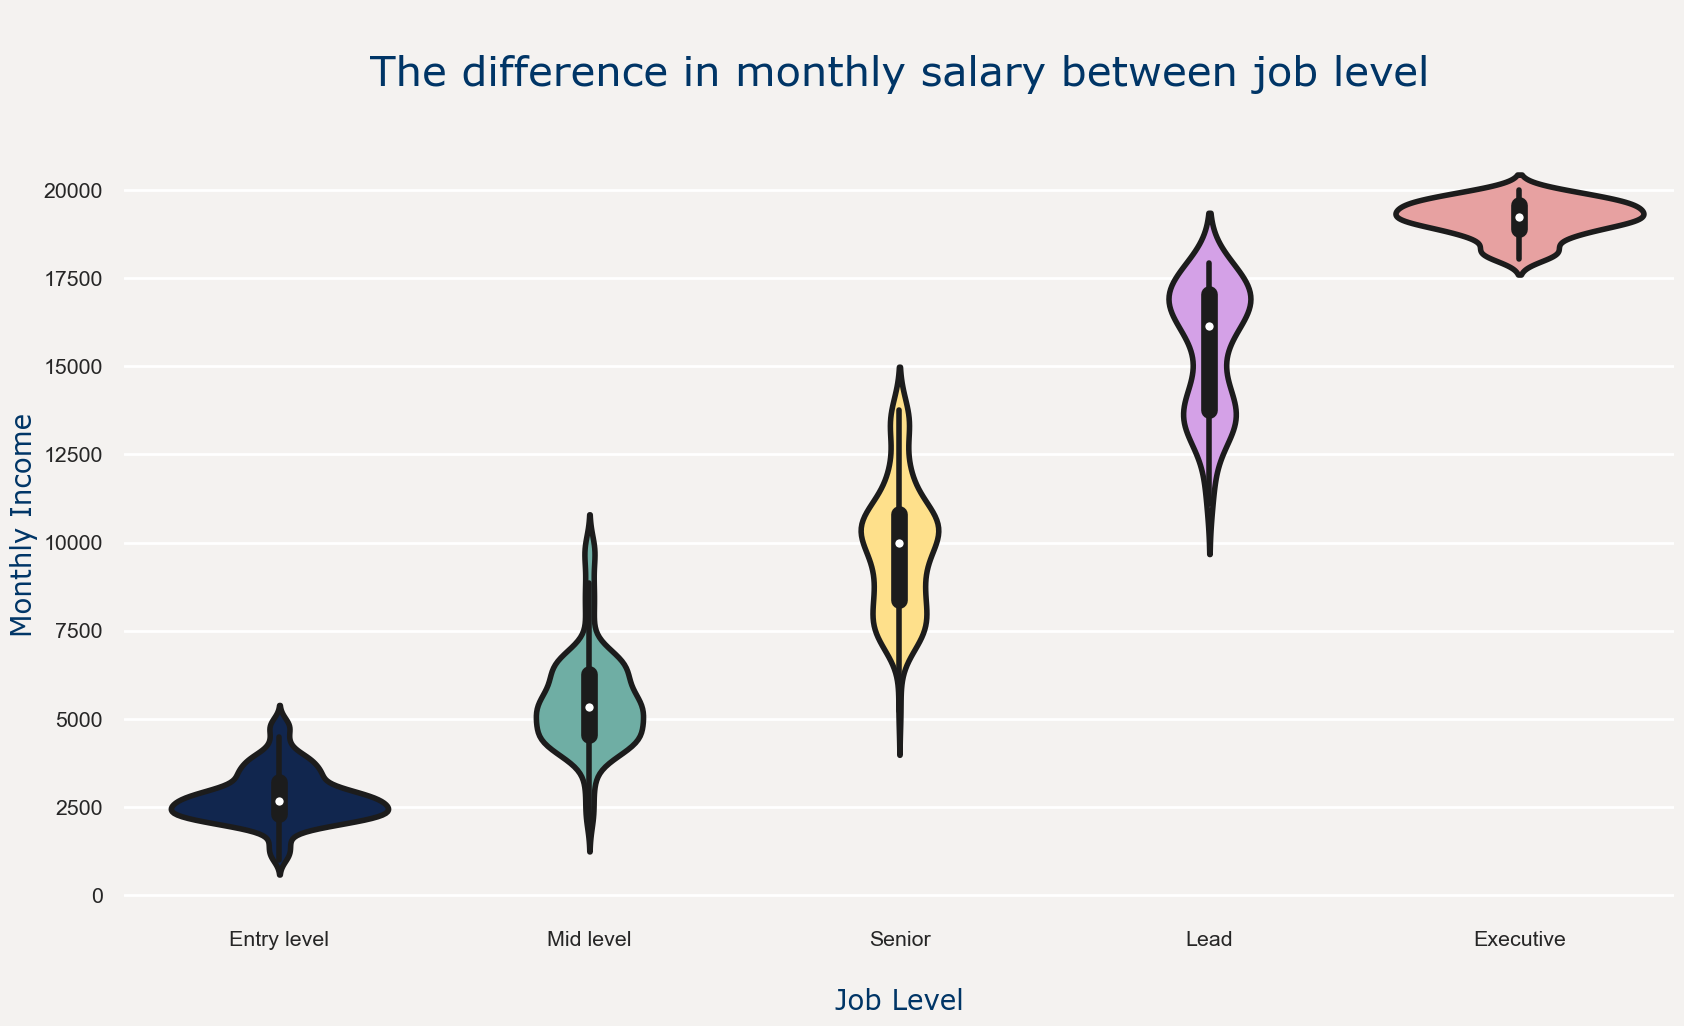

In [40]:
palette = ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"]
sns.set(rc={"axes.facecolor":"#F4F2F0","figure.facecolor":"#F4F2F0"})
sns.set_context("poster",font_scale = .7)

plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=plot_df["JobLevel"],y=plot_df["MonthlyIncome"],order=plot_df["JobLevel"].value_counts().index,palette=palette,saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nThe difference in monthly salary between job level\n",fontsize=30, family ='Verdana', color ='#003566')
p.axes.set_xlabel("\nJob Level",fontsize=20, family ='Verdana', color ='#003566')
p.axes.set_ylabel("Monthly Income",fontsize=20, family ='Verdana', color ='#003566')

sns.despine(left=True, bottom=True)


#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

Based on the above Violin plot chart, we have the following comments:
- It is obvious that the higher the employee's rank in the job, the higher the monthly income.
- Mid level, Senior, Lead have a wide salary distribution range, which can be considered as having many outliers.

<a id="3.11"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 11 📉</h2>

**Title:** Is marital status related to the decision to quit or not?

**Chart type:** Countplot

**Visualization:**

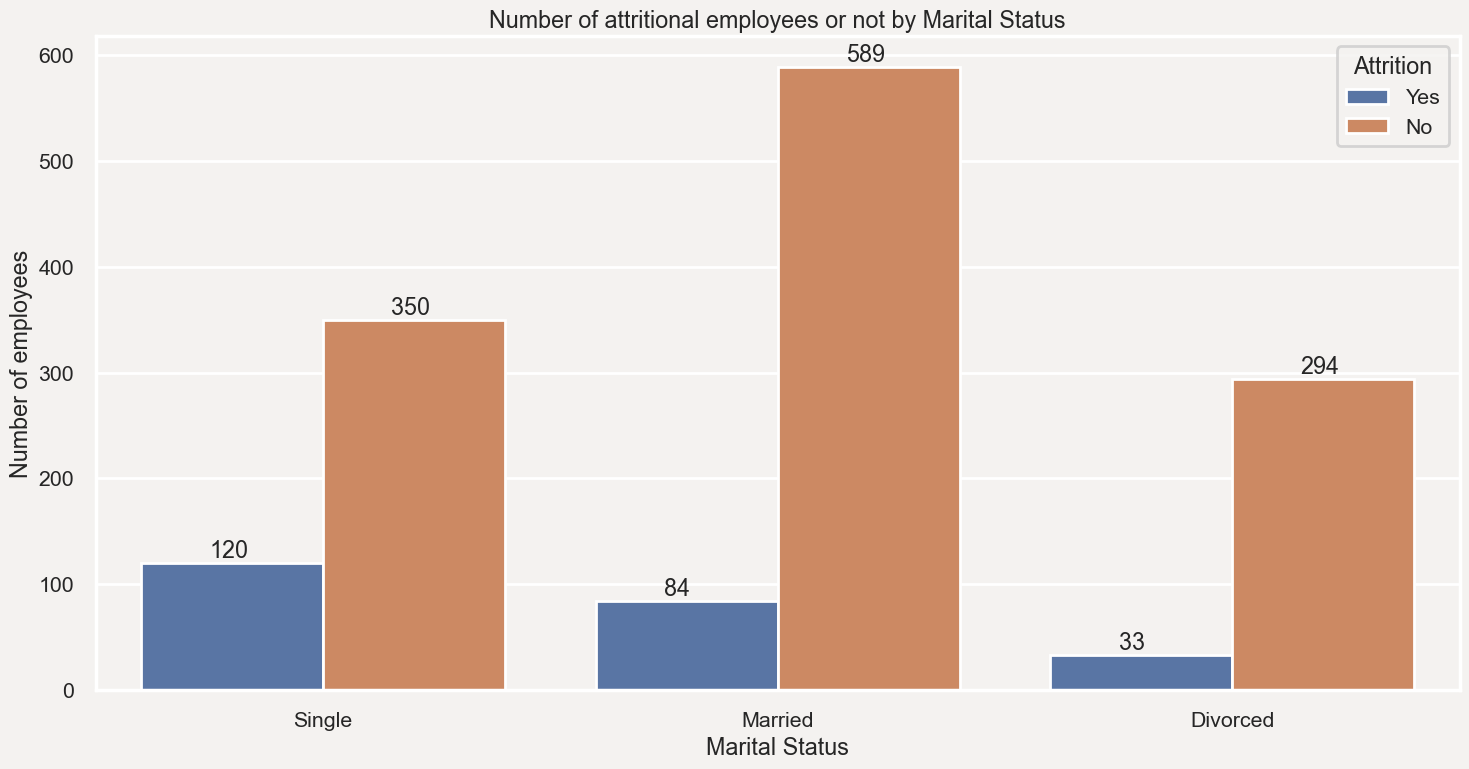

In [41]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
g = sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
g.set(title='Number of attritional employees or not by Marital Status')
g.set_xlabel('Marital Status')
g.set_ylabel('Number of employees')
g.set_yticks(range(0, 700, 100))
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Based on the compound column chart, we have the following comments:
- The percentage of employees who are married accounts for the largest number, this is completely appropriate when the age of employees in this company is from 26-40 accounting for about 60% (Figure 9), this is the appropriate age to set up a company. family.
- The rate of single employees, although ranked second, has the highest turnover rate. This can be seen that young and free people (not having to worry about family) tend to "jump work" to experience many different working environments and find jobs that match their interests.

<a id="3.12"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 12 📉</h2>

**Title:** Monthly income by total years of work and job rank

**Chart type:** Scatter plot

**Visualization:**

In [42]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#88C9D1', '#CCD188', '#707BAD', '#48795E','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='<b>Monthly income according to the total number of years of work and level in the job </b>',
                  title_font = dict(size = 15, family ='Verdana', color ='#003566'),
                  xaxis_title='Total Working Years', yaxis=dict(title='Monthly income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  height = 500,
                  width = 1000)
fig.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
Based on the scatter plot above, we can see:
- The higher the rank in the job, the more monthly income tends to be.
- Levels such as: Entry level, Mid level have the number of working years in the range of 0 - 20 years. While to be able to be in the highest position of Executive, it is necessary to work for more than 20 years, even over 35 years.

<a id="3.13"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 13 📉</h2>

**Title:** Level of job satisfaction and balance by age.

**Chart type:** Line plot

**Visualization:**

In [43]:
def year_stats(year):
    return year//5;

df_ = df.copy()
df_['year_stats'] = df_['YearsAtCompany'].map(year_stats)

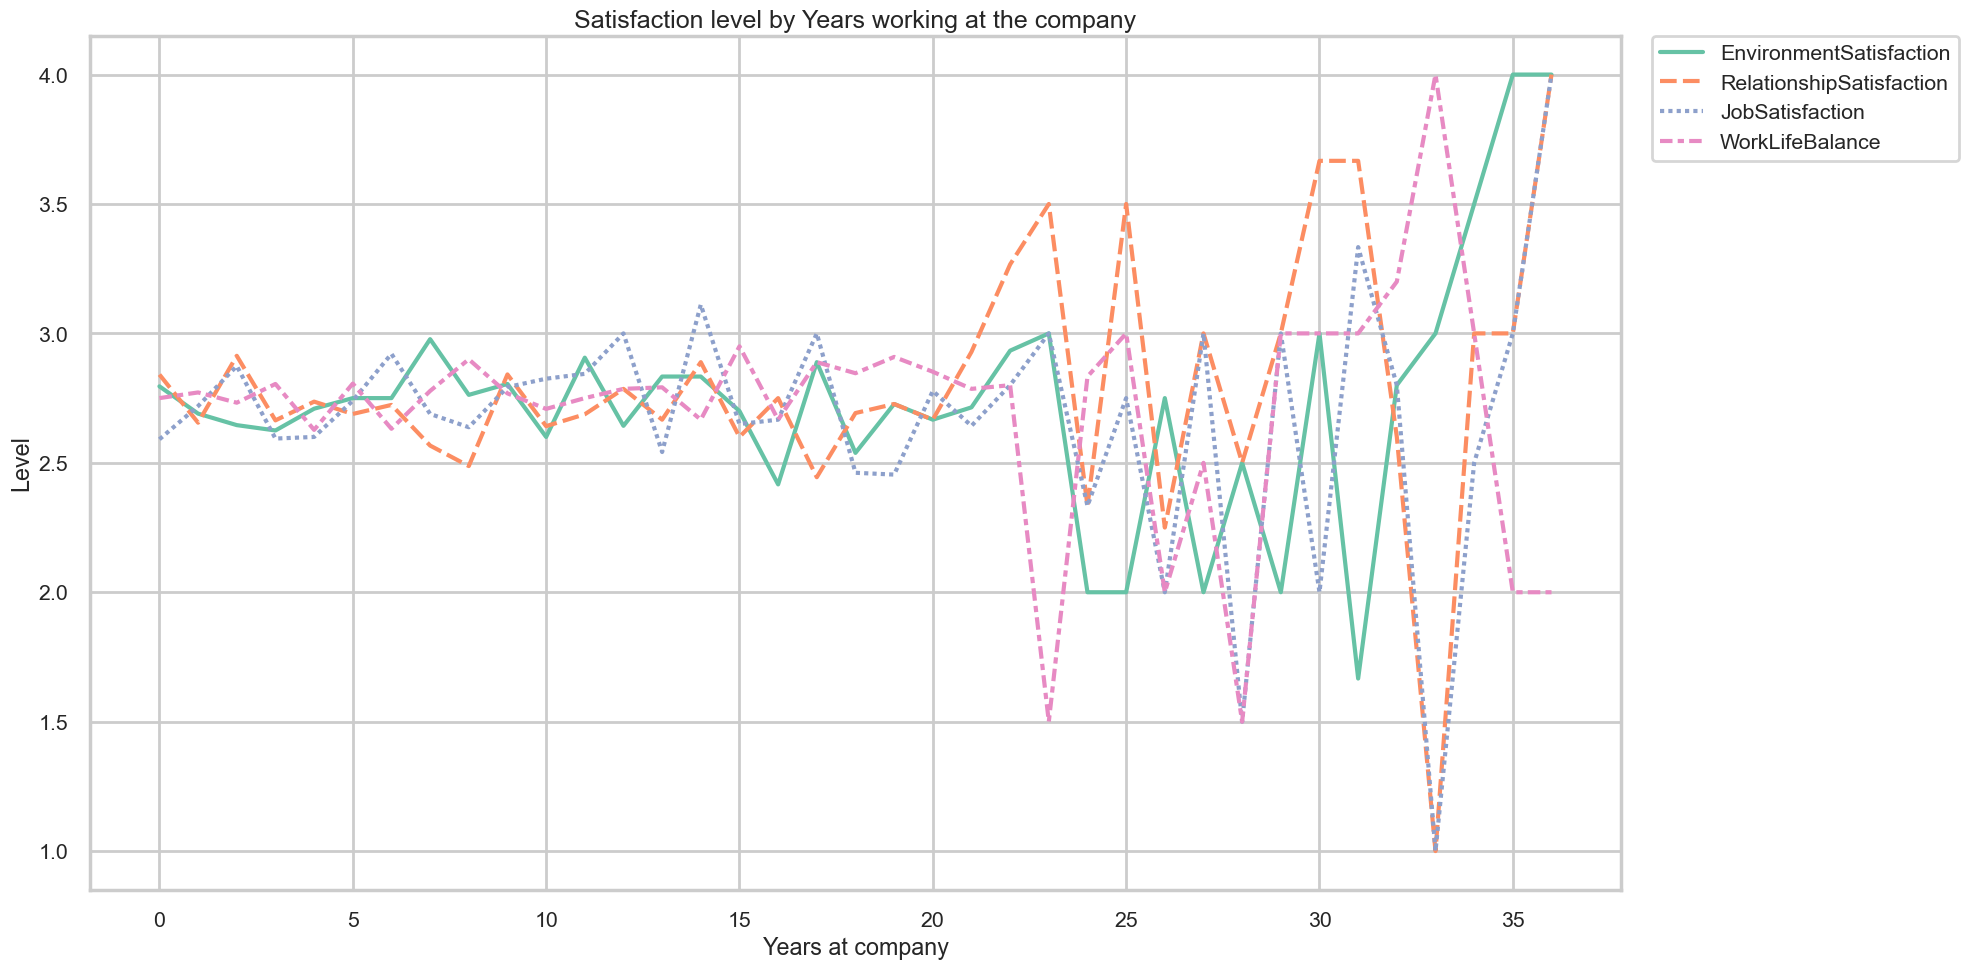

In [44]:
df_satis = df_[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'YearsAtCompany', 'year_stats']]
df_satis_year = df_satis.groupby('YearsAtCompany')[['EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance', 'JobSatisfaction']].mean().reset_index()
sns.set_palette("Set2")
sns.set_style('whitegrid')
plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_satis_year[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance']])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Satisfaction level by Years working at the company', fontsize = 18)

plt.xlabel('Years at company')
plt.ylabel('Level')
plt.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- There is a clear difference between employee satisfaction by age, which is clearly separated at the 20th working year.
- Group under 20 years old: less volatile, fluctuates at 2.5-3.
- Group over 20 years old:
     - More volatility. The more you stick with the company, the more you can access different aspects of the job, the more diverse the needs that people require at work.
     - Work-life balance often tends to be the opposite of the rest of the characteristics. This shows job satisfaction in 3 aspects (environment, relationship, work) that are often parallel and related to each other. In addition, satisfaction is also a great motivation for employees, they tend to spend more time on work. Since then, the time for other life activities is also reduced, affecting work-life balance.
     - The more attached to the company, the more obvious the influence. Even then the employees already have working experience in that company.
    

<a id="3.14"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 14 📉</h2>

**Title:** Salary distribution according to job position and people's satisfaction level.

**Chart type:** Dot and jitter plot.

**Visualization:**

In [45]:
df_['satisfaction'] = (df_['JobSatisfaction'] + df_['EnvironmentSatisfaction'] + df_['RelationshipSatisfaction'])/3

In [46]:
stripplot =  alt.Chart(df_, width=120,  title="Monthly income by Job Roles and Attrition rate").mark_circle(size=11).encode(
    #color = "Attrition",
    color=alt.Color('Attrition', scale=alt.Scale(scheme='dark2')),
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale()
    ),
    y=alt.Y('MonthlyIncome:Q'),
    #color=alt.Color('JobRole:N', legend=None),
    column=alt.Column(
        'JobRole:N',
        header=alt.Header(
            labelAngle=0,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='center',
            labelPadding=10,
        ),
    ),
    
    tooltip = ["JobRole", "MonthlyIncome"]
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).properties(
    width=125,
    height=500
).configure_title(
    fontSize=20,
    anchor='middle',  # <---- does not take effect, why?
    color='gray'
)
stripplot

alt.Chart(...)

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left">

- Salary distribution of different positions. In which the highest are Manager and Research Director, these are management positions. These are also the 2 groups with the lowest number of "regret" employees.
- Human Resources positions have a small number, but the salary range is also quite wide, showing that although this profession has few employees, the salary also varies among individuals.
- When dividing about Attrition rating, we see a clear grouping with 2 positions: Human Resources and Sales Representative. Those who vote Yes are in the lower salary group, so it can be seen that salary has a lot of influence on employees' evaluation of jobs in these two industries. In the remaining industries, Attrition vote does not have much difference in salary ranks (the dots are quite mixed together).

<a id="3.15"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>| Chart </b> 15 📉</h2>

**Title:** Names of learning fields shown through word cloud

**Chart Type:** WordCloud

**Visualization:**

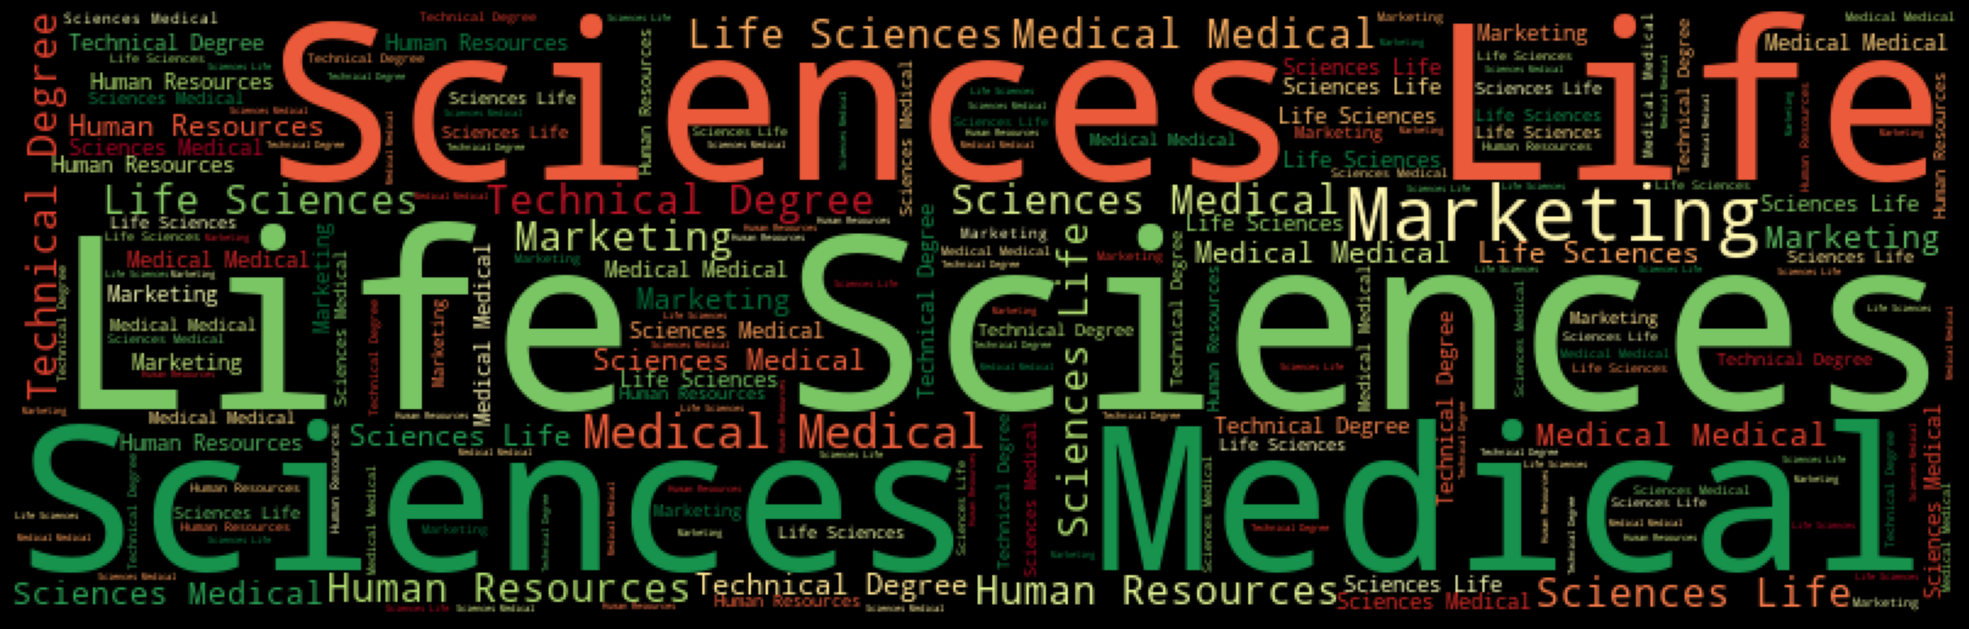

In [47]:
text = " ".join(EducationField for EducationField in df["EducationField"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "black") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

#### <span style='color:#2B9C15 '>💬 Comment </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">

 There are many major names displayed in a special way on WordCloud such as: human resources, sciences medical, life sciences, marketing, technical degree, ...

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>D. Machine Learning Models</b></div>

<a id="4.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>I. The problem posed </b> </h2>

**Problem posed:**

Predict whether employees are at risk of leaving the company they are working for?

**General introduction:**

- In machine learning, supervised learning is a group of popular algorithms in this field and one of the important problems of supervised learning is the classification problem.
- There are two common types of classification: binary classification and multiclassification, and in the problem that the group poses, this is a binary classification problem: from the input attributes of an employee such as the total number of years of work, salary level. , satisfaction with the working environment, ... predicts whether that employee is at risk of leaving the current company (whether the company loses employees or not) (0: No / 1: Yes ).
- The team will create a logistic regression model for the binary classification problem.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>II. Data preprocessing </b> </h2>

In [48]:
df_copy=df.copy()

<a id="4.2.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Encoding catalog attributes in numerical form</b></h2>

In [49]:
#filter out category attributes
cat_cols=df_copy.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [50]:
#count the number of distinct values in each of the above category attributes
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

A few comments are as follows:
- The Over18 column contains only 1 type of value, 'Y', which proves that this column will not affect the results of the model training.
- There are 3 properties, Attrition, Gender, and OverTime, which have 2 different types of values, so with these properties we can encode by assigning labels 0/1 to them.
- For attributes with more than 2 value types, we will highlight with a one-hot vector, the reason for using one-hot without using ordinal or label to avoid bias caused by encoding into the values. large value if the number of values is large.

In [51]:
#remove attribute 'Over18'
df_copy.drop(['Over18'],axis=1, inplace=True)

In [52]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [53]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

In [54]:
df_copy.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                        4       0          56  ...   
4               7                        1       1          40  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 53 columns]

<a id="4.2.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Eliminate the attributes that do not make sense for the problem</b></h2>

**Option 1:**
- **The most rudimentary way that can be thought of as a way of eliminating meaningfully immediately visible attributes that are not necessary for the classification problem:** The 'Over18' attribute example is removed above because they only carry a value of 'yes', understandable when the dataset is provided by IBM, based in the US, and the US only allows work when 18 years old or older. In addition, when looking at the table of meanings of the attributes that the team provided in the data collection section, the column 'StandardHours' will also make no sense for the problem because this column carries the same value for all employees. the standard working hours they have to go to work, can delete this attribute.

In [55]:
#delete 'StandardHours'
df_copy.drop(['StandardHours'],axis=1,inplace=True)

**Option 2:**
- **The next way is to use the correlations value between each independent variable and the dependent variable:**
   Correlation is a commonly used statistical term that refers to the degree to which two variables have a linear relationship with each other.
   + Correlation has the highest value of 1 (two variables are completely linear) and the lowest if the two variables do not have a linear relationship.
   + The team will create a dataframe named 'correlations' containing the correlations of each column in the dataset to easily comment on the degree of correlation between variables.

In [56]:
correlations=df_copy.corr()
correlations

Age  Attrition  DailyRate  \
Age                                1.000000  -0.159205   0.010661   
Attrition                         -0.159205   1.000000  -0.056652   
DailyRate                          0.010661  -0.056652   1.000000   
DistanceFromHome                  -0.001686   0.077924  -0.004985   
Education                          0.208034  -0.031373  -0.016806   
EmployeeCount                           NaN        NaN        NaN   
EmployeeNumber                    -0.010145  -0.010577  -0.050990   
EnvironmentSatisfaction            0.010146  -0.103369   0.018355   
Gender                            -0.036311   0.029453  -0.011716   
HourlyRate                         0.024287  -0.006846   0.023381   
JobInvolvement                     0.029820  -0.130016   0.046135   
JobLevel                           0.509604  -0.169105   0.002966   
JobSatisfaction                   -0.004892  -0.103481   0.030571   
MonthlyIncome                      0.497855  -0.159840   0.007707   
MonthlyRate                        0.028051   0.015170  -0.032182   
NumCompaniesWorked                 0.299635   0.043494   0.038153   
OverTime                           0.028062   0.246118   0.009135   
PercentSalaryHike                  0.003634  -0.013478   0.022704   
PerformanceRating                  0.001904   0.002889   0.000473   
RelationshipSatisfaction           0.053535  -0.045872   0.007846   
StockOptionLevel                   0.037510  -0.137145   0.042143   
TotalWorkingYears                  0.680381  -0.171063   0.014515   
TrainingTimesLastYear             -0.019621  -0.059478   0.002453   
WorkLifeBalance                   -0.021490  -0.063939  -0.037848   
YearsAtCompany                     0.311309  -0.134392  -0.034055   
YearsInCurrentRole                 0.212901  -0.160545   0.009932   
YearsSinceLastPromotion            0.216513  -0.033019  -0.033229   
YearsWithCurrManager               0.202089  -0.156199  -0.026363   
BusinessTravel_Non-Travel         -0.011215  -0.074457   0.012096   
BusinessTravel_Travel_Frequently  -0.024743   0.115143  -0.011776   
BusinessTravel_Travel_Rarely       0.028791  -0.049538   0.002078   
Department_Human Resources         0.020523   0.016832  -0.026726   
Department_Research & Development  0.017883  -0.085293   0.014871   
Department_Sales                  -0.027549   0.080855  -0.003616   
EducationField_Human Resources     0.001696   0.036466  -0.043144   
EducationField_Life Sciences       0.016824  -0.032703   0.004028   
EducationField_Marketing           0.038162   0.055781  -0.064449   
EducationField_Medical            -0.006354  -0.046999   0.034202   
EducationField_Other              -0.041466  -0.017898  -0.003893   
EducationField_Technical Degree   -0.027604   0.069355   0.030869   
JobRole_Healthcare Representative  0.098825  -0.078696   0.040141   
JobRole_Human Resources           -0.029856   0.036215  -0.021156   
JobRole_Laboratory Technician     -0.143176   0.098290  -0.006728   
JobRole_Manager                    0.294248  -0.083316  -0.013224   
JobRole_Manufacturing Director     0.049726  -0.082994  -0.005302   
JobRole_Research Director          0.185891  -0.088870  -0.000021   
JobRole_Research Scientist        -0.146518  -0.000360  -0.002624   
JobRole_Sales Executive           -0.002001   0.019774  -0.000513   
JobRole_Sales Representative      -0.175785   0.157234   0.005375   
MaritalStatus_Divorced             0.033120  -0.087716   0.037080   
MaritalStatus_Married              0.083919  -0.090984   0.040035   
MaritalStatus_Single              -0.119185   0.175419  -0.075835   

                                   DistanceFromHome  Education  EmployeeCount  \
Age                                       -0.001686   0.208034            NaN   
Attrition                                  0.077924  -0.031373            NaN   
DailyRate                                 -0.004985  -0.016806            NaN   
DistanceFromHome                           1.000000   0.02

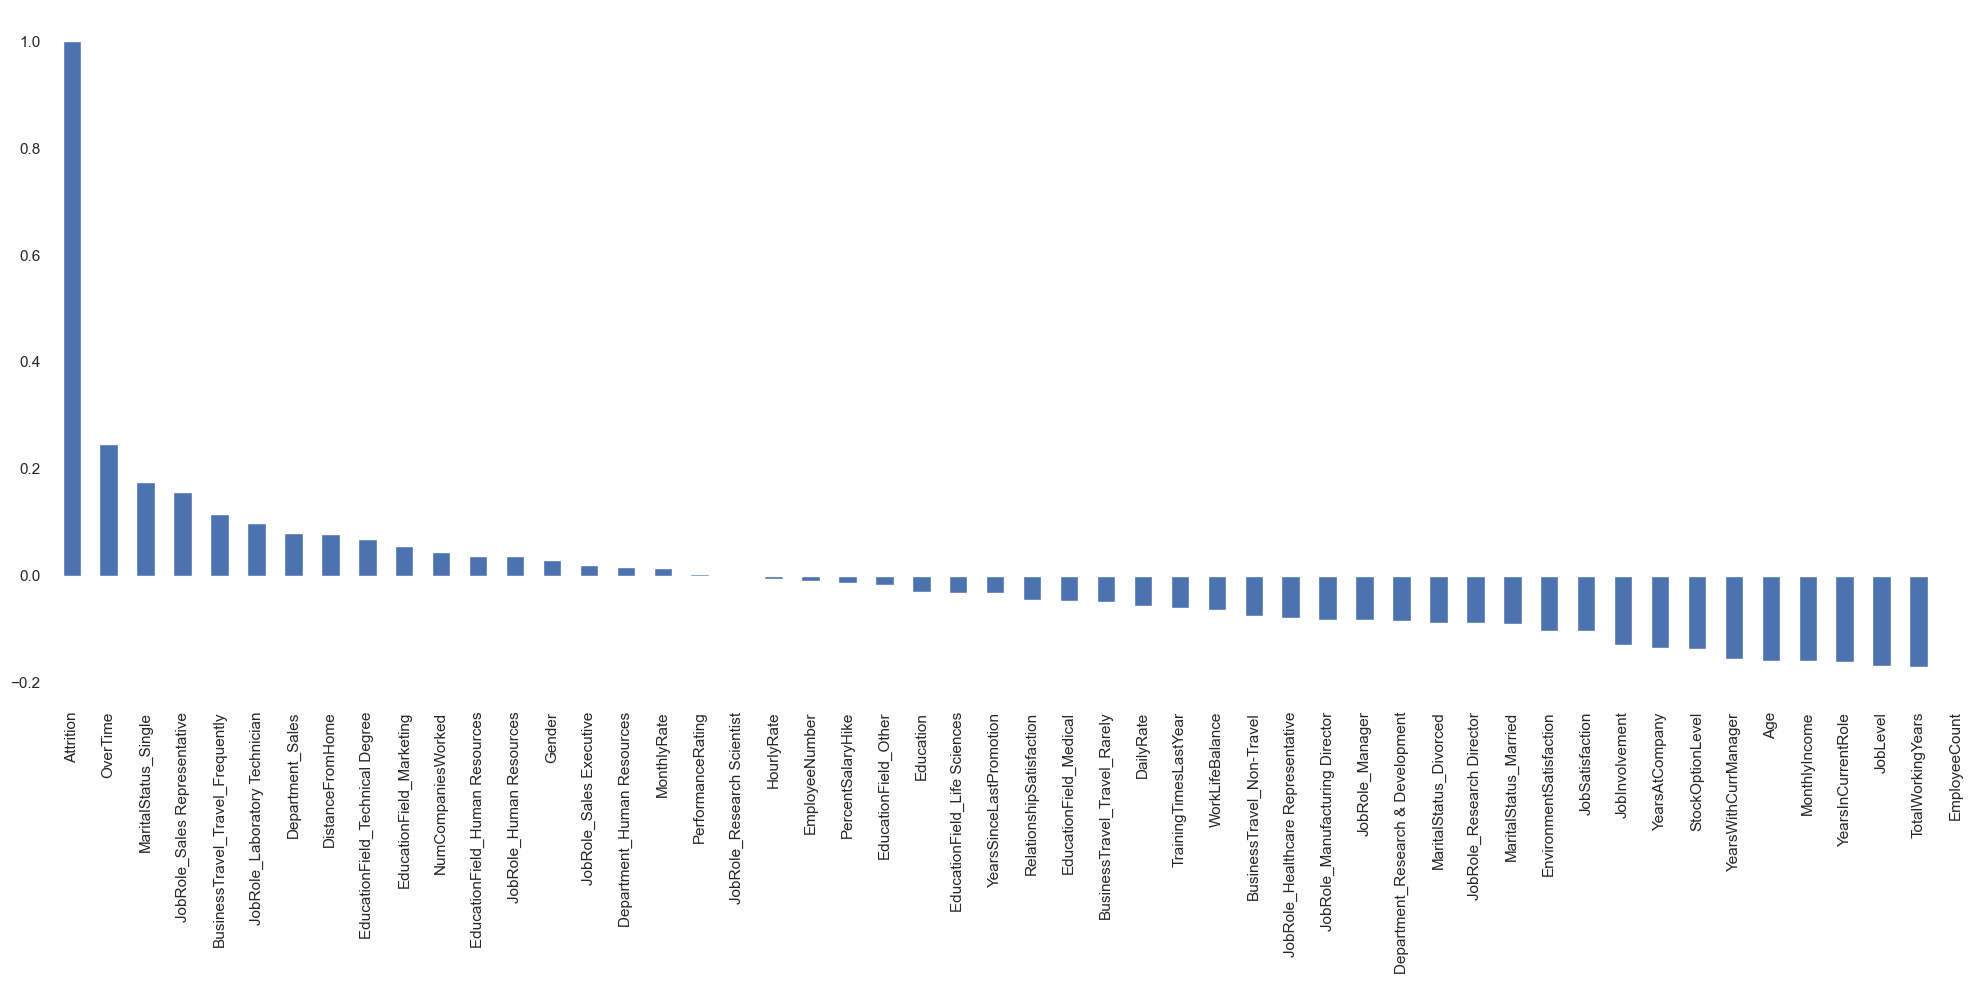

In [57]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

It is immediately obvious that 'EmployeeCount' has absolutely no relation to 'Attrition'.

In [58]:
df_copy.drop(['EmployeeCount'],axis=1,inplace=True)

In [59]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)

In [60]:
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

**Option 3:**
Using correlations between independent variables:
   + The higher the correlation between the two independent variables, the more similar information they bring to the context of the problem.
   + Therefore, when two independent variables have high correlation, one can be selected to apply to model training.

In [61]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

feature1                 feature2  correlation
0                    JobLevel            MonthlyIncome     0.950300
1                    JobLevel        TotalWorkingYears     0.782208
2               MonthlyIncome        TotalWorkingYears     0.772893
3           PercentSalaryHike        PerformanceRating     0.773550
4              YearsAtCompany       YearsInCurrentRole     0.758754
5              YearsAtCompany     YearsWithCurrManager     0.769212
6          YearsInCurrentRole     YearsWithCurrManager     0.714365
7  Department_Human Resources  JobRole_Human Resources     0.904983
8            Department_Sales  JobRole_Sales Executive     0.808869

- **TotalWorkingYears, JobLevel and MonthlyIncome:** Have very high correlation value. Choose to keep MonthlyIncome.
- **PercentSalaryHike and PerformanceRating:** Have a correlation value of 0.77. Choose to keep PerformanceRating.
- **YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager:** Have high correlation value. Choose to keep YearsAtCompany.
- **Department_Human Resources and JobRole_Human Resources:** Have correlation value of 0.9. Choose to keep JobRole_Human Resources.
- **Department_Sales and JobRole_Sales Executive:** Have correlation value of 0.8. Choose to keep JobRole_Sales Executive.

In [62]:
df_copy.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

In [63]:
df_copy.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 44 columns]

<a id="4.2.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Handling missing values</b></h2>

In [64]:
df_copy.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

The tuple does not have any missing values in all attribute columns. So you can skip this step.

<a id="4.3"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>III. Building a machine learning model </b> </h2>

<a id="4.3.1"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>1. Logistic Regression for Binary Classification</b></h2>

**Description of the problem:**
- The objective of the binary classification problem is to predict the probability of belonging to one of the two classes to be classified of a dependent variable based on independent variables (also known as attributes).
- In this dataset we will try to predict **probability of belonging to class 0 or 1 of variable Attrition based on other independent attributes of an employee.**

<a id="4.3.2"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>2. Using Pipeline and Metrics used to evaluate the model</b></h2>

**Pipeline:**
- Pipeline is a tool that helps combine multiple steps of data processing and model training into a complete process.
- The steps to build a machine learning model will be sequentially in a Pipeline object (can be seen as a pipeline to lead through the steps one by one).

Pipeline saves time and optimizes model training.

**Measurements:**
- The measures used by the team in this lesson will be:
   + Accuracy score.
   + Precision.
   + Recall.
   + F1-score.


<a id="4.3.3"></a>
<h2 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A800B; background-color: #ffffff;"><b>3. Implement</b></h2>

**Create a set of input attributes and a set of target variables from the original data set.**

In [65]:
X=np.array(df_copy.drop(['Attrition'],axis=1))
y=np.array(df_copy['Attrition'])

In [66]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]], dtype=int64)

In [67]:
y

array([1, 0, 1, ..., 0, 0, 0])

**Divide data set into training set and test set:**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [69]:
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


**Model Settings:**

In [70]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Pipeline Explanation:** Building a pipeline performs the following steps:
- First create a 'scaler' component that does the normalization of the data as mentioned at the end of the data preprocessing section. This component uses the StandardScaler() class provided by sklearn to normalize the value of each column in X according to the Standardization method.
- Next is to create a classifier 'classifier' to perform the classification of input samples about one of the two classes of the binary classification problem. This classifier applies the Logistic Regression algorithm that the team introduced earlier (The parameters in the LogisticRegression class will be explained in the accompanying report file).

In [71]:
#predict
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

**Evaluate the model:** First consider the value of accuracy score.

In [72]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


Accuracy Score is quite high, but is it good enough for evaluating the effectiveness of the model?

Let's take a closer look at the other metrics.

In [73]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294



- Other measures such as Precision, Recall and F1-score are all very low in class 1 than in class 0, proving that the predictive model is not good for predicting fields that actually belong to class 1 (or say it). in this context are samples that belong to the negative class).
- And this makes us think of the case of imbalanced data.

**Check data balance:**

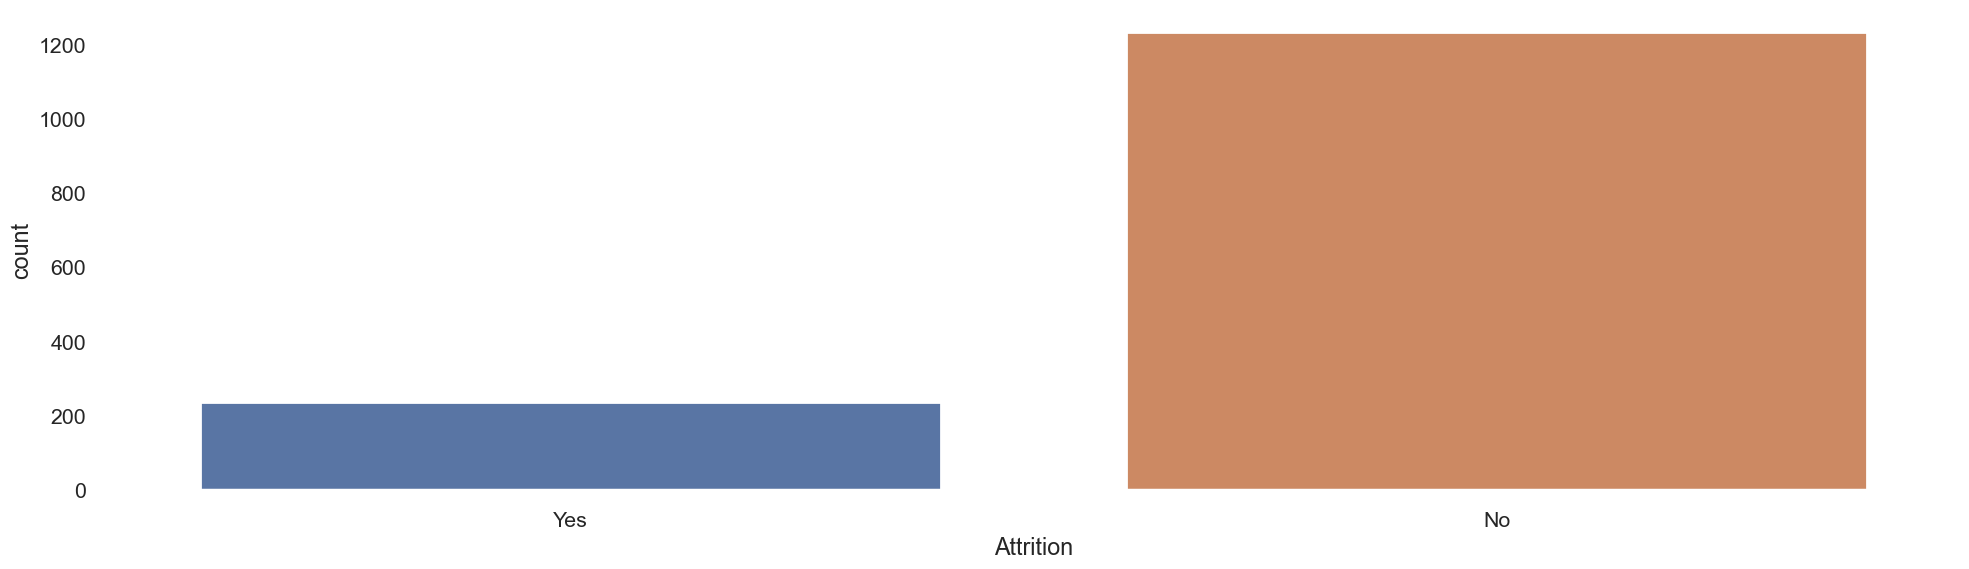

In [74]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attrition']);

- It is clear that an imbalance occurs between classes 0 and 1 when the number of elements of class 0 in this dataset is approximately 6 times the number of elements of class 1.
- This serious imbalance greatly affects the accuracy of the model.

**Use weights to increase model penalty if wrong class prediction:**

In [75]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [76]:
predictions2=pipe2.predict(X_test)

In [77]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [78]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294



- Using a larger weight for class 1 has improved the precision and f1-score of class 1 significantly, showing that the overarching of the model has been increased.
However, these measures have not yet reached a really good value for a classification problem.
- And the group also experimented with many different weight pairs, but the best result was {0:1, 1:2}.

**Apply SMOTE algorithm:**

In [79]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

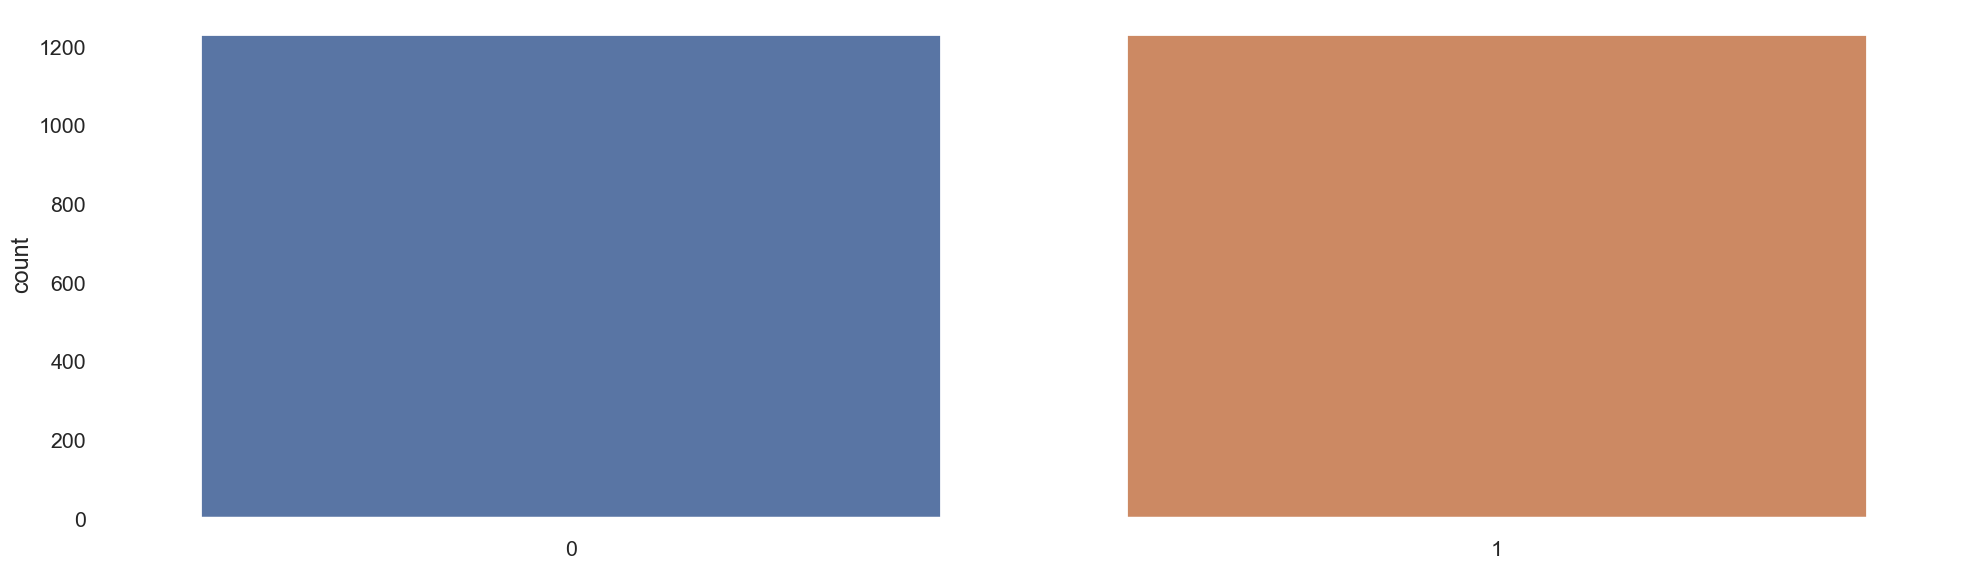

In [80]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

**Divide data set into training set and test set:**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [82]:
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


**Model Settings:**

In [83]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [84]:
#dự đoán
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

**Model rating:**

In [85]:
#First look at the model's accuracy score
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [86]:
#More detailed look at other metric values like F1-score or Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494



- All measures are at 90% or more, showing the effectiveness of the SMOTE algorithm on this dataset.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color:#254E58; background-color: #ffffff;"><b>V. Summary </b> </h2>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
    
- The project will not delve into extracting any meaning from the data set through building a machine learning model. This is done at another stage, the EDA dataset.
- Through the machine learning model, the group focuses on the following aspects:
   + Pre-processing of data.
   + Extract features.
   Build effective machine learning models.
  
- The project has discovered the problem of data imbalance occurring on this dataset, which causes many difficulties for the process of building classifiers.
- Implement methods to solve the problem of data imbalance and build a machine learning model to use as a classifier with very satisfactory results:
   + Accuracy score: 90%.
   + Precision macro average: 91%.
   + Recall macro average: 91%.
   + F1-Score macro average: 90%.

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>END</b></div>

<center> <img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/87481-of-thanks-letter-text-logo-calligraphy-drawing%20(1).png" style='width: 600px; height: 300px;'>

### <center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>